# Bank Marketing Data Set

## Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**

## Attribute Information:

### Input variables:

##### Bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')

6 - housing: has housing loan? (categorical: 'no',' yes', 'unknown')

7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')


##### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular', 'telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

11 - duration: last contact duration, in seconds (numeric). 


##### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')


##### Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

# PROJECT 1

# Setup Imports and Variables

In [2]:
import pandas as pd
import numpy as np
#import pylab as plt
import matplotlib.pyplot as plt


# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
figsize_with_subplots = (18, 30)

# Size of matplotlib histogram bins
bin_size = 10

# Importing data, Exploratory Data Analysis and Imputing Missing values

## Import and Explore Data

Read the data:

In [3]:
df = pd.read_csv('bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


View the data types of each column:

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Get some basic information on the DataFrame:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

job, marital, education, default, housing and loan have missing values. 

Generate various descriptive statistics on the DataFrame:

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Now that we have a general idea of the data set contents, we can dive deeper into each column. 
We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

Plot a few features to get a better idea of each:

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

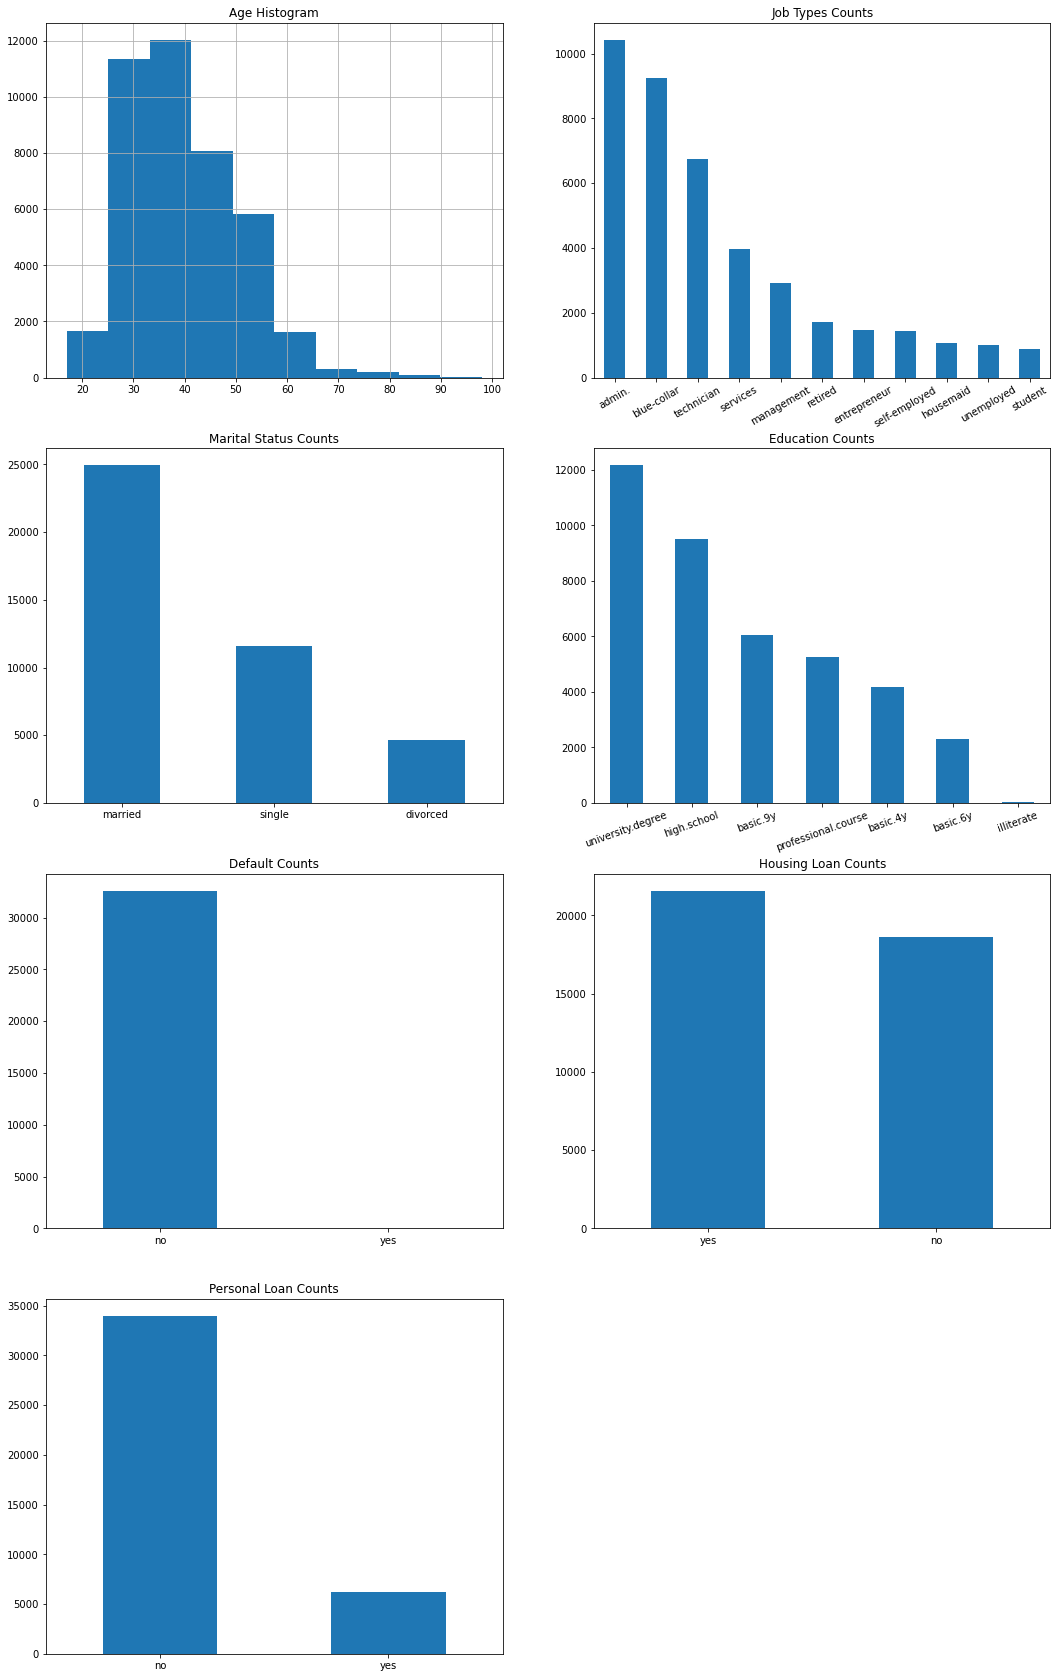

In [9]:
# Set up a grid of plots
fig = plt.figure(figsize=figsize_with_subplots) 
fig_dims = (4, 2)

# Plot the Age histogram
plt.subplot2grid(fig_dims, (0, 0))
df['age'].hist()
plt.title('Age Histogram')

# Plot job types counts
plt.subplot2grid(fig_dims, (0, 1))
df['job'].value_counts().plot(kind='bar', title='Job Types Counts')
plt.xticks(rotation=30)

# Plot marital status counts
plt.subplot2grid(fig_dims, (1, 0))
df['marital'].value_counts().plot(kind='bar', title='Marital Status Counts')
plt.xticks(rotation=0)

# Plot education counts
plt.subplot2grid(fig_dims, (1, 1))
df['education'].value_counts().plot(kind='bar', title='Education Counts')
plt.xticks(rotation=20)

# Plot 'has credit in default?' counts
plt.subplot2grid(fig_dims, (2, 0))
df['default'].value_counts().plot(kind='bar', title='Default Counts')
plt.xticks(rotation=0)

# Plot 'has housing loan?' counts
plt.subplot2grid(fig_dims, (2, 1))
df['housing'].value_counts().plot(kind='bar', title='Housing Loan Counts')
plt.xticks(rotation=0)

# Plot 'has personal loan?' counts
plt.subplot2grid(fig_dims, (3, 0))
df['loan'].value_counts().plot(kind='bar', title='Personal Loan Counts')
plt.xticks(rotation=0)



Next we'll explore various features to view their impact on term deposit subscription.

## Feature: Age

Determine the Age typical for each passenger class by Sex. We'll use the median instead of the mean because the Age histogram seems to be right skewed.## Feature Age

Determine the Age typical for subscribed and unsubscribed clients. We'll use the median instead of the mean because the Age histogram seems to be right skewed.

In [10]:
df[['age', 'y']].groupby('y').median()

,age
y,
no,38
yes,37


We find the age distribution for subscribed and unsubscribed clients

Text(0, 0.5, 'Count')

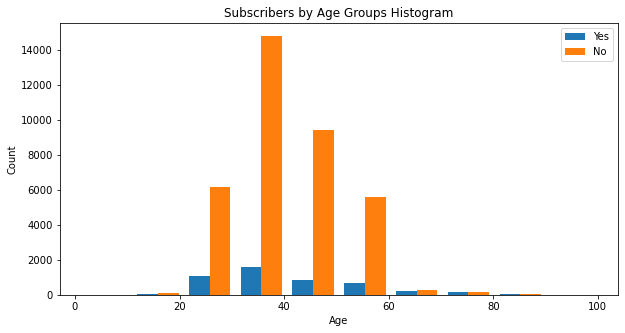

In [11]:
df1 = df[df['y'] == 'yes']['age']
df2 = df[df['y'] == 'no']['age']

plt.hist([df1, df2], bins= 10, range=(1, 100))
plt.legend(('Yes', 'No'), loc='best')
plt.title('Subscribers by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')

* We see that most clients contacted are in the range of age 20 to 60.

* Most subscriptions came from the age group 30 to 40 as shown in the graph above.

## Feature: Job

<AxesSubplot:title={'center':'Subscription by Job'}, xlabel='job'>

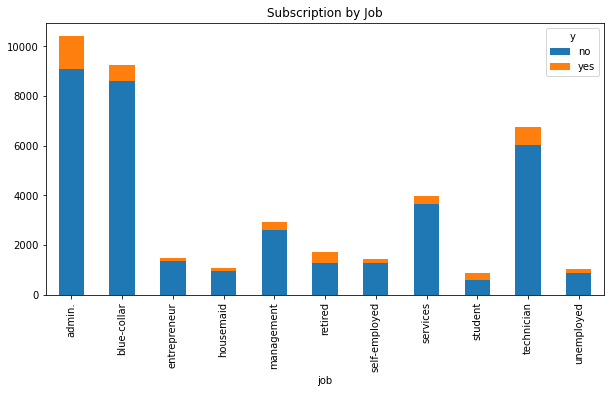

In [12]:
job_val_xt = pd.crosstab(df['job'], df['y'])
job_val_xt.plot(kind = 'bar', stacked=True, title='Subscription by Job')

<AxesSubplot:title={'center':'Subscription Rate by Job'}, xlabel='job'>

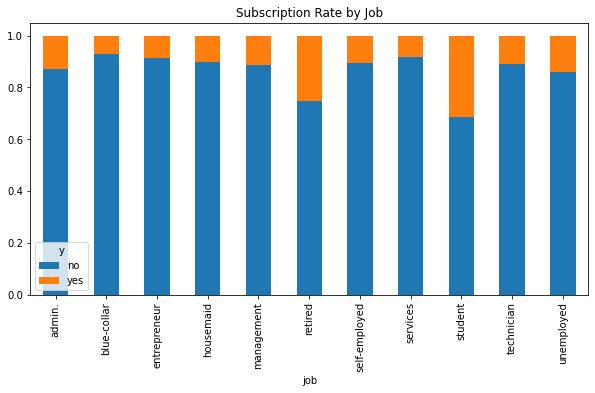

In [13]:
job_val_xt_pct = job_val_xt.div(job_val_xt.sum(1).astype(float), axis=0)
job_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Job')

* Clients with administrative job are contacted more than other clients as they have the most subscriptions. 
* Entreprenuer and self-employed clients are contacted less and also have less subscription of term-deposit as they would prefer to invest their money in their own businesses.
* Housemaid, retired, student and unemployed are also contacted less compared to other clients. 
* But you can see that the Subscription Rate for retired and students is the highest. More students and retired clients can be contacted to improve subscription rate.

In [14]:
df.job.isna().sum()

330

In [15]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

Imputing missing values:

Since the majority of clients have job 'admin.' we assign the missing values in job to 'admin.'.

In [16]:
df['job'].replace(np.NaN, 'admin.',inplace = True)

## Feature: Marital

<AxesSubplot:title={'center':'Subscription by Marital'}, xlabel='marital'>

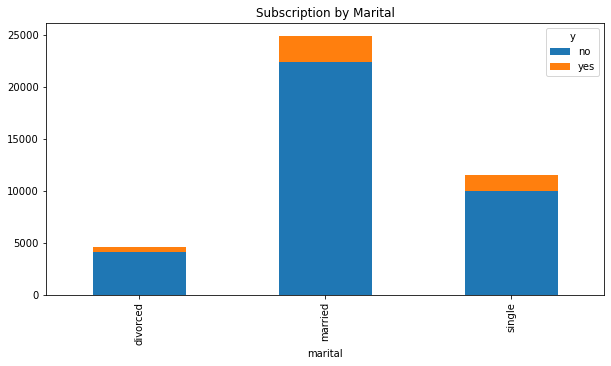

In [17]:
marital_val_xt = pd.crosstab(df['marital'], df['y'])
marital_val_xt.plot(kind = 'bar', stacked=True, title='Subscription by Marital')

<AxesSubplot:title={'center':'Subscription Rate by Marital'}, xlabel='marital'>

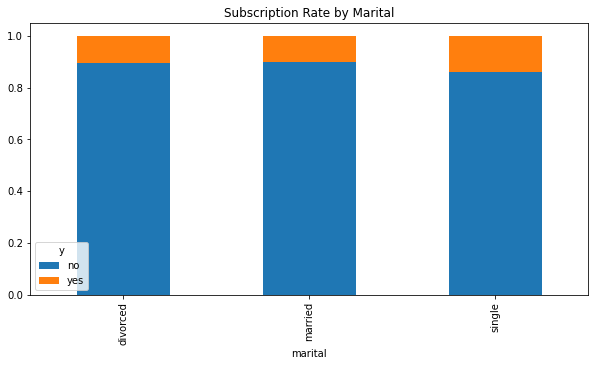

In [18]:
marital_val_xt_pct = marital_val_xt.div(marital_val_xt.sum(1).astype(float), axis=0)
marital_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Marital')

* We see that most clients contacted and most term deposit subscriptions came from clients who are married eventhough the subscription rate is almost equal in all categories.

In [19]:
df.marital.isna().sum()

80

In [20]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

Imputing missing values:

Since the majority of clients have marital status as 'married' we assign the missing values in marital to 'married'.

In [21]:
df['marital'].replace(np.NaN, 'married',inplace = True)

## Feature: Education

<AxesSubplot:title={'center':'Subscription by Education'}, xlabel='education'>

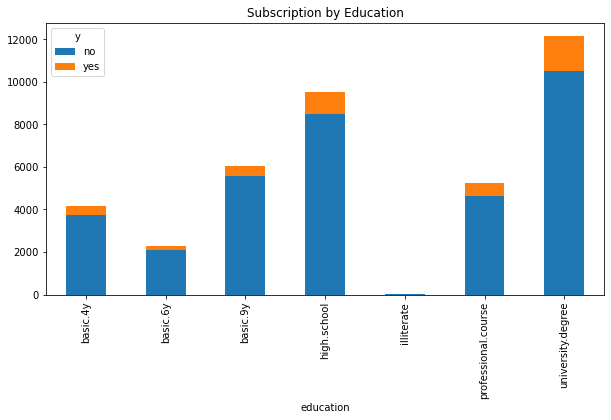

In [22]:
education_val_xt = pd.crosstab(df['education'], df['y'])
education_val_xt.plot(kind = 'bar', stacked=True, title='Subscription by Education')

<AxesSubplot:title={'center':'Subscription Rate by Education'}, xlabel='education'>

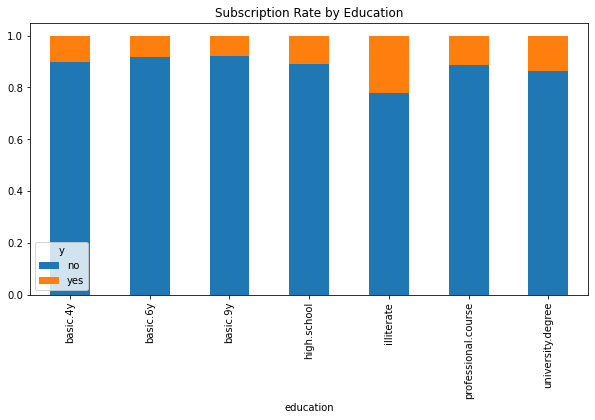

In [23]:
education_val_xt_pct = education_val_xt.div(education_val_xt.sum(1).astype(float), axis=0)
education_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Education')

In [24]:
df.education.isna().sum()

1731

In [25]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

Imputing missing values:

Since the majority of clients have education as 'university.degree' we assign the missing values in education to 'university.degree'.

In [26]:
df['education'].replace(np.NaN, 'university.degree',inplace = True)

## Feature: Default

<AxesSubplot:title={'center':'Subscription Rate by Default'}, xlabel='default'>

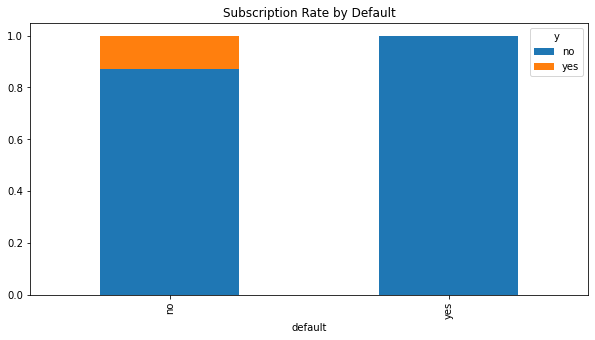

In [27]:
default_val_xt = pd.crosstab(df['default'], df['y'])
default_val_xt_pct = default_val_xt.div(default_val_xt.sum(1).astype(float), axis=0)
default_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Default')

If the client has credit in default, he will not subscribe for the term loan

In [28]:
df.default.isna().sum()

8597

In [29]:
df.default.value_counts()

no     32588
yes        3
Name: default, dtype: int64

Imputing missing values:

Since the majority of clients have default as 'no' we assign the missing values in default to 'no'.

In [30]:
df['default'].replace(np.NaN, 'no',inplace = True)

## Feature: Housing

<AxesSubplot:title={'center':'Subscription by Housing Loan'}, xlabel='housing'>

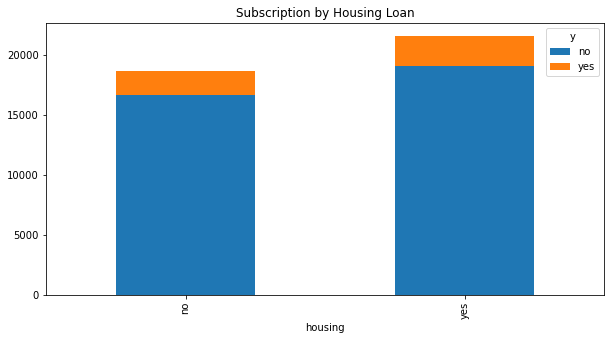

In [31]:
housing_val_xt = pd.crosstab(df['housing'], df['y'])
housing_val_xt.plot(kind = 'bar', stacked=True, title='Subscription by Housing Loan')

<AxesSubplot:title={'center':'Subscription Rate by Housing Loan'}, xlabel='housing'>

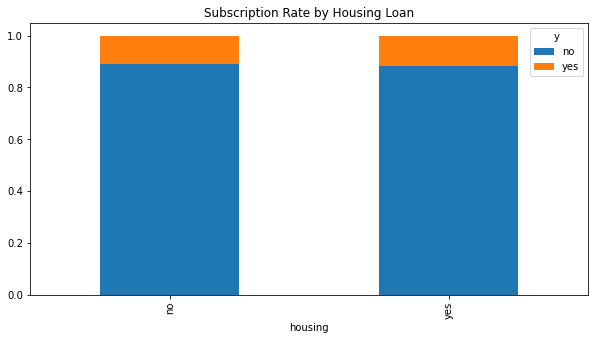

In [32]:
housing_val_xt_pct = housing_val_xt.div(housing_val_xt.sum(1).astype(float), axis=0)
housing_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Housing Loan')

In [33]:
df.housing.isna().sum()

990

In [34]:
df.housing.value_counts()

yes    21576
no     18622
Name: housing, dtype: int64

Imputing missing values:

Since the majority of clients have housing as 'yes' we assign the missing values in housing to 'yes'.

In [35]:
df['housing'].replace(np.NaN, 'yes',inplace = True)

## Feature: Loan

In [36]:
df.loan.isna().sum()

990

In [37]:
df.loan.value_counts()

no     33950
yes     6248
Name: loan, dtype: int64

Imputing missing values:

Since the majority of clients have housing as 'yes' we assign the missing values in housing to 'yes'.

In [38]:
df['loan'].replace(np.NaN, 'no',inplace = True)

## Making lists of variable types for numerical and categorical data

In [39]:
categorical = [var for var in df.columns if df[var].dtype == 'O' and var != 'y']

discrete = [var for var in df.columns if df[var].dtype != 'O' and len(df[var].unique()) < 20 
            and var != 'y']

continuous = [var for var in df.columns if df[var].dtype != 'O'and var not in discrete and var != 'y']

print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(categorical)} categorical variables')

There are 7 continuous variables
There are 3 discrete variables
There are 10 categorical variables


## Checking the distribution of the continuous variables via distplots

C:\Users\neema\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\neema\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\neema\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

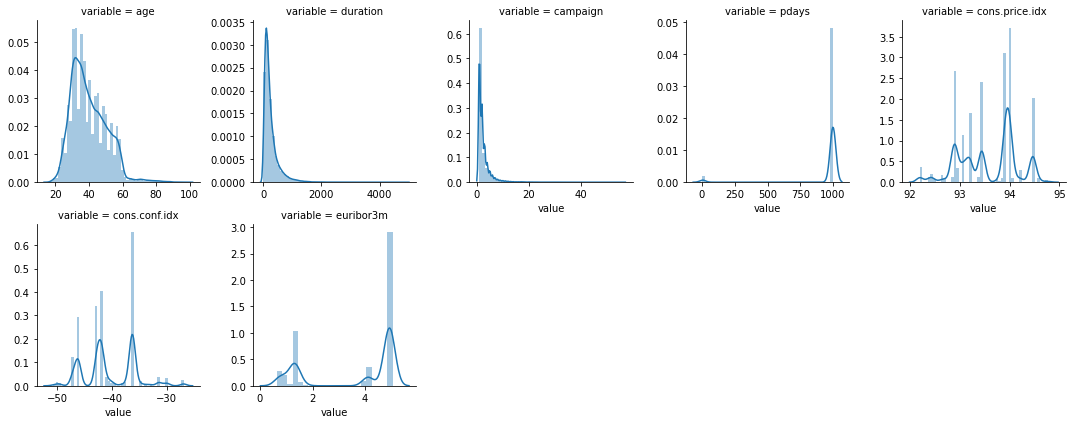

In [40]:
import seaborn as sns
nd = pd.melt(df, value_vars = continuous)
n1 = sns.FacetGrid (nd, col = 'variable', col_wrap = 5, sharex = False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

## Exploring the distribution of the categorical features via histograms

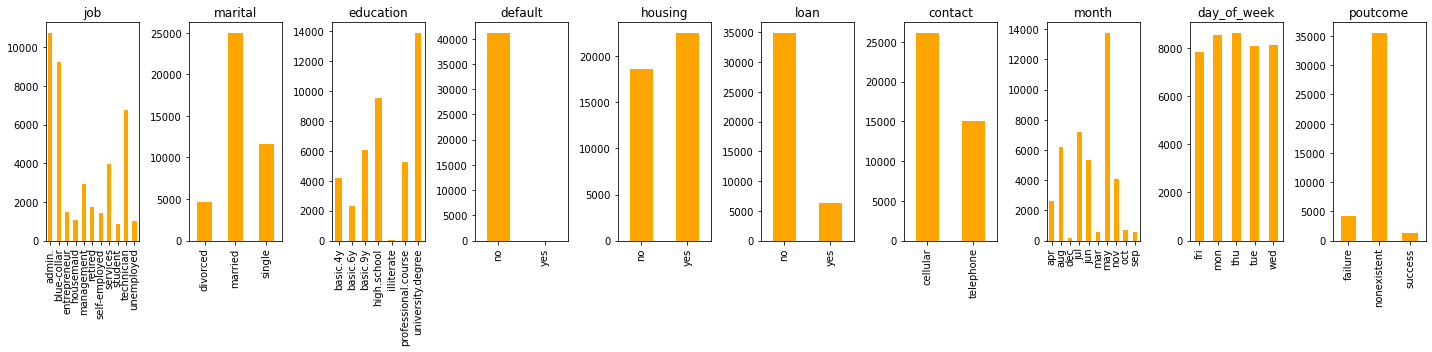

In [41]:
fig, axes = plt.subplots(ncols = len(categorical), figsize=(20,5))
for col, ax in zip(categorical, axes):
    df[col].value_counts().sort_index().plot.bar(ax=ax, title=col, color=['orange'])

plt.tight_layout()    
plt.show()

## Correlation Matrix

In [42]:
import seaborn as sns

<ipython-input-43-209e9ee9a6bf>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


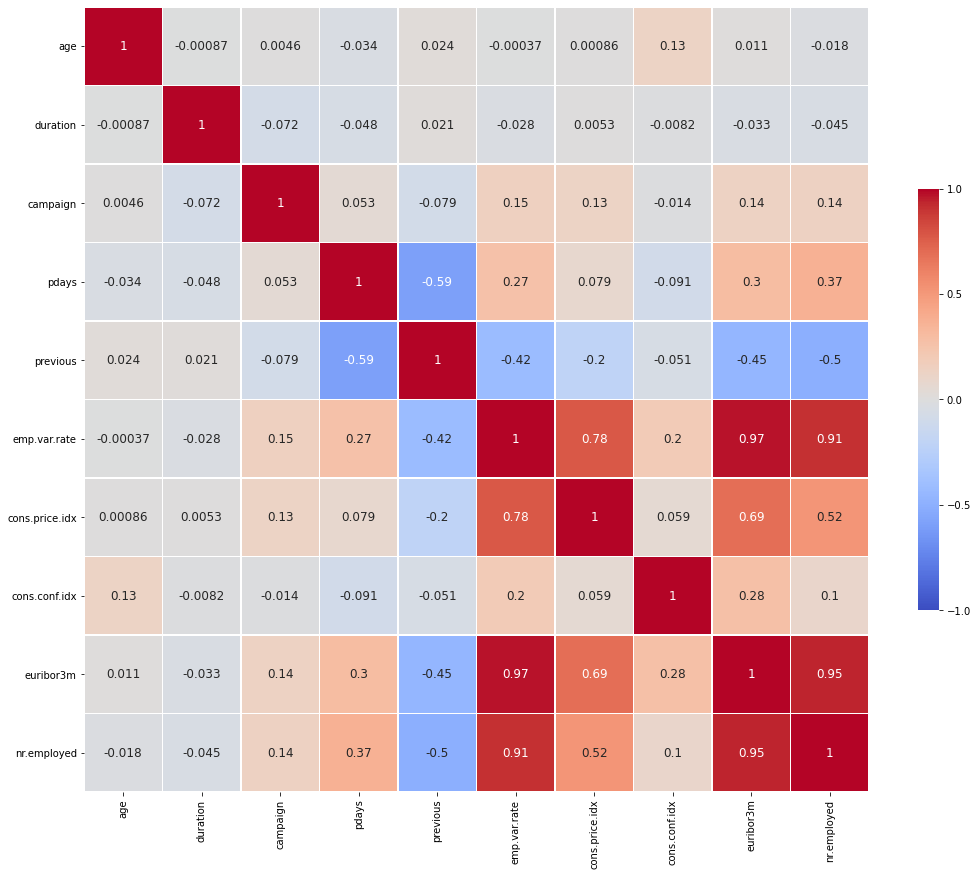

In [43]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
f, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(df.corr(), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(df.corr().columns, rotation = 0)
ax.set_xticklabels(df.corr().columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.tight_layout()

# Data Preprocessing 

In [44]:
X = df.drop('y', axis=1)
y = df['y']

## Handling Categorical values

We map the target value **y** as 'yes' to 1 and 'no' to 0.

In [45]:
y = y.map({'yes':1, 'no':0}).astype(int)

We replace the column **job** with a one-hot-vector of length 11.

In [46]:
cols = pd.get_dummies(X['job'], prefix= 'job')
X[cols.columns] = cols
X.drop('job', axis = 1, inplace = True)

We replace the column **marital** with a one-hot-vector of length 3.

In [47]:
cols = pd.get_dummies(X['marital'], prefix= 'marital')
X[cols.columns] = cols
X.drop('marital', axis = 1, inplace = True)

We replace the column **education** with a one-hot-vector of length 7.

In [48]:
cols = pd.get_dummies(X['education'], prefix= 'education')
X[cols.columns] = cols
X.drop('education', axis = 1, inplace = True)

The frequent class in column **default** is no, so we map 'no' to 1 and 'yes' to 0.

In [49]:
X['default'] = X['default'].map({'no':1, 'yes':0}).astype(int)

The frequent class in column **housing** is yes, so we map 'yes' to 1 and 'no' to 0.

In [50]:
X['housing'] = X['housing'].map({'yes':1, 'no':0}).astype(int)

The frequent class in column **loan** is no, so we map 'no' to 1 and 'yes' to 0.

In [51]:
X['loan'] = X['loan'].map({'no':1, 'yes':0}).astype(int)

The frequent class in column **contact** is cellular, so we map 'cellular' to 1 and 'telephone' to 0.

In [52]:
X['contact'] = X['contact'].map({'cellular':1, 'telephone':0}).astype(int)

We replace the column **month** with a one-hot-vector of length 12.

In [53]:
cols = pd.get_dummies(X['month'], prefix= 'month')
X[cols.columns] = cols
X.drop('month', axis = 1, inplace = True)

We replace the column **day_of_week** with a one-hot-vector of length 7.

In [54]:
cols = pd.get_dummies(X['day_of_week'], prefix= 'day_of_week')
X[cols.columns] = cols
X.drop('day_of_week', axis = 1, inplace = True)

We replace the column **poutcome** with a one-hot-vector of length 3.

In [55]:
cols = pd.get_dummies(X['poutcome'], prefix= 'poutcome')
X[cols.columns] = cols
X.drop('poutcome', axis = 1, inplace = True)

## Splitting Data

Splitting data into train and test sets

In [56]:
from sklearn.model_selection import train_test_split

# split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


print("Size of training set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 30891   size of test set: 10297



In [57]:
X_train.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
10685,52,1,0,1,0,676,2,999,0,1.4,...,0,0,0,0,0,1,0,0,1,0
224,40,1,0,1,0,168,1,999,0,1.1,...,0,0,0,1,0,0,0,0,1,0
29638,28,1,1,1,1,187,1,999,0,-1.8,...,0,0,0,1,0,0,0,0,1,0
4804,52,1,0,1,0,68,1,999,0,1.1,...,0,0,0,0,0,0,1,0,1,0
11614,35,1,0,1,0,81,2,999,0,1.4,...,0,0,1,0,0,0,0,0,1,0


## Dummy Classifier - Base model

In [58]:
y_train.value_counts()

0    27409
1     3482
Name: y, dtype: int64

The dataset is imbalanced as the count of yes(subscribed a term deposit) is much lower than no(not subscribed a term deposit).

First, we build a Dummy Classifier model. 

In [59]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [0]
Test score: 0.89


## Dropping unwanted features
'duration' is the last contact duration, in seconds (numeric).

This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed.

Also, after the end of the call y is obviously known. Thus, this feature should only be included for benchmark purposes and should be discarded to have a realistic predictive model.

In [60]:
X_train = X_train.drop('duration', axis=1)
X_test = X_test.drop('duration', axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30891 entries, 10685 to 2732
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30891 non-null  int64  
 1   default                        30891 non-null  int32  
 2   housing                        30891 non-null  int32  
 3   loan                           30891 non-null  int32  
 4   contact                        30891 non-null  int32  
 5   campaign                       30891 non-null  int64  
 6   pdays                          30891 non-null  int64  
 7   previous                       30891 non-null  int64  
 8   emp.var.rate                   30891 non-null  float64
 9   cons.price.idx                 30891 non-null  float64
 10  cons.conf.idx                  30891 non-null  float64
 11  euribor3m                      30891 non-null  float64
 12  nr.employed                    30891 non-nu

In [61]:
X_train.describe()

,age,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.00000,30891.000000,30891.000000,30891.000000,...,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000,30891.000000
mean,39.965848,0.999935,0.546923,0.849050,0.635849,2.562008,962.51481,0.171474,0.081878,93.576382,...,0.017902,0.014179,0.189440,0.207245,0.209705,0.194490,0.199119,0.102133,0.864459,0.033408
std,10.424467,0.008046,0.497801,0.358006,0.481199,2.767311,186.81696,0.492702,1.573389,0.579168,...,0.132596,0.118230,0.391864,0.405339,0.407105,0.395814,0.399345,0.302828,0.342306,0.179702
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,-3.400000,92.201000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,1.000000,0.000000,1.000000,999.00000,0.000000,-1.800000,93.075000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,1.000000,1.000000,1.000000,1.000000,2.000000,999.00000,0.000000,1.100000,93.749000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,1.000000,1.000000,1.000000,1.000000,3.000000,999.00000,0.000000,1.400000,93.994000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,56.000000,999.00000,7.000000,1.400000,94.767000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
X_train_cols = X_train.columns

## Scaling the features

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='duration', ylabel='age'>,
        <AxesSubplot:xlabel='campaign', ylabel='age'>,
        <AxesSubplot:xlabel='pdays', ylabel='age'>,
        <AxesSubplot:xlabel='previous', ylabel='age'>,
        <AxesSubplot:xlabel='emp.var.rate', ylabel='age'>,
        <AxesSubplot:xlabel='cons.price.idx', ylabel='age'>,
        <AxesSubplot:xlabel='cons.conf.idx', ylabel='age'>,
        <AxesSubplot:xlabel='euribor3m', ylabel='age'>,
        <AxesSubplot:xlabel='nr.employed', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='duration'>,
        <AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='campaign', ylabel='duration'>,
        <AxesSubplot:xlabel='pdays', ylabel='duration'>,
        <AxesSubplot:xlabel='previous', ylabel='duration'>,
        <AxesSubplot:xlabel='emp.var.rate', ylabel='duration'>,
        <AxesSubplot:xlabel='cons.price.idx', ylabel='duration'>,
        <AxesSub

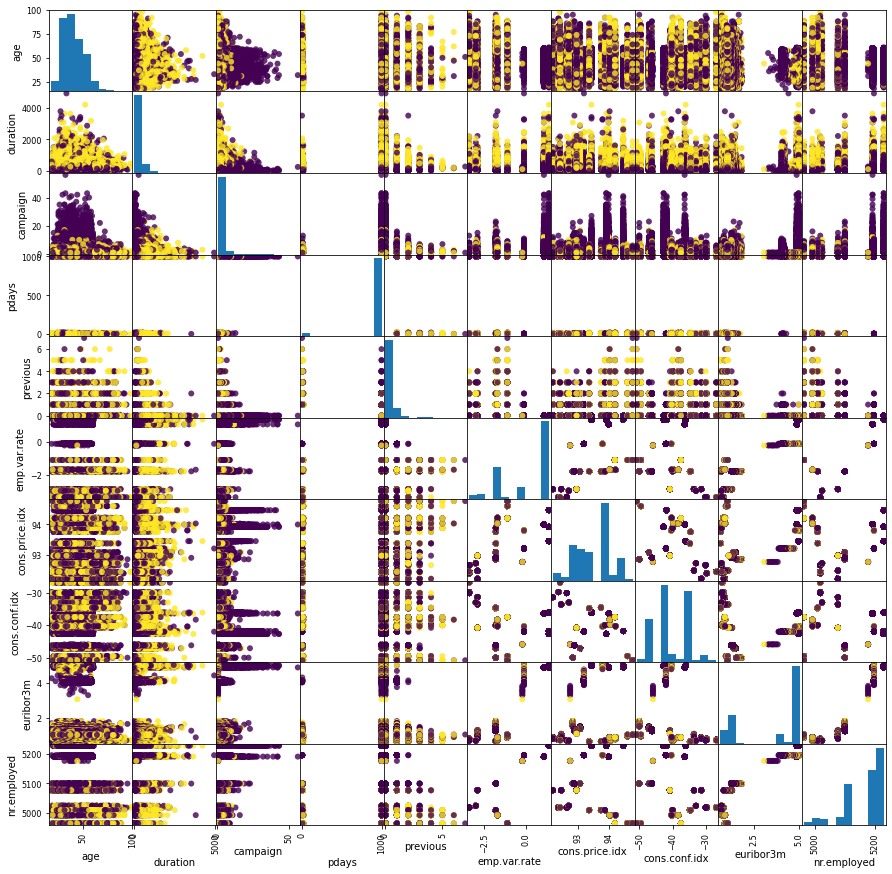

In [63]:
%matplotlib inline
from pandas.plotting import scatter_matrix

X_s = df.drop('y', axis=1)
y_s = df['y']
y_s = y_s.map({'yes':1, 'no':0}).astype(int)
 

attributes = X_s.columns
scatter_matrix(X_s[attributes], figsize = (15,15), c = y_s, alpha = 0.8, marker = 'O')

As we can clearly see that data for almost all the statistical varaibales is not normally distributed, hence we will use MinMaxScaller to scale the data.

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Evaluation Strategy

- Using accuracy as the metric is not optimal to making the best prediction especially due to the fact that our data set is imbalanced
- For Ex: Suppose we have 80% of the data points of just class A ; 
    we can achieve 80% accuracy by just making every prediction A

- To achieve an optimal result we would like to maximize two components:

    (1) The "True Positive Rate" aka Sensitivity aka Recall. Given by: TP/(TP+FN)

    (2) The Precision - How many of the positive predictions, are in fact correct. Given by: TP/(TP+FP)


- To obtain a balance between both we use F Beta Measure which is given by: (2 x Precision x Recall)/(Precision+Recall)
- F2-measure puts more attention on minimizing false negatives which is critical for our problem statement given that we would not want to lose out on potenttial subscribers.

In [65]:
#creating a scorer for F2 score so that we can given an emphases on the minority class predictions
from sklearn.metrics import fbeta_score, make_scorer
f2score = make_scorer(fbeta_score, beta=2)
f2score

make_scorer(fbeta_score, beta=2)

# K Neighbors Classifier

## Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

#param_grid = {'n_neighbors': [*range(1,20)]}

# Re-run with smaller param set
param_grid = {'n_neighbors': [4,8,11,19]}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [4, 8, 11, 19]}


In [65]:
from sklearn.neighbors import KNeighborsClassifier

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, scoring = f2score, n_jobs= -1, verbose = 4)

In [66]:
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [4, 8, 11, 19]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [69]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'n_neighbors': 11}
Best cross-validation score: 0.24


In [70]:
# convert to DataFrame
results_knn = pd.DataFrame(grid_search_knn.cv_results_)
# show the first 5 rows
display(results_knn.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.065199,0.030339,98.600917,51.474203,4,{'n_neighbors': 4},0.207779,0.216594,0.185930,0.183578,...,0.199675,0.012831,4,0.306496,0.308293,0.319334,0.308242,0.291420,0.306757,0.008922
1,0.071999,0.024608,105.765387,54.739513,8,{'n_neighbors': 8},0.216306,0.228486,0.198053,0.207289,...,0.213110,0.010125,3,0.264279,0.254096,0.268177,0.266294,0.249519,0.260473,0.007327
2,0.184998,0.086752,53.462121,22.586236,11,{'n_neighbors': 11},0.245308,0.251976,0.233831,0.246037,...,0.243715,0.005985,1,0.283749,0.282218,0.285926,0.284690,0.274466,0.282210,0.004057
3,0.958113,1.600155,39.879580,20.124083,19,{'n_neighbors': 19},0.226667,0.235235,0.220957,0.227882,...,0.226764,0.004905,2,0.242178,0.248268,0.245155,0.240783,0.238474,0.242972,0.003420


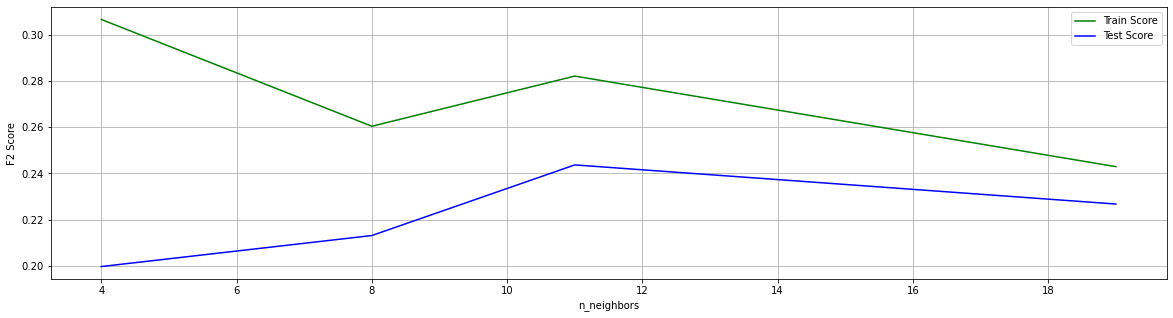

In [74]:
x_axis = np.array([4,8,11,19])
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, np.array(results_knn.mean_train_score), label = 'Train Score', c = 'g')
plt.plot(x_axis, np.array(results_knn.mean_test_score), label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('F2 Score')
plt.grid()
plt.legend()

In [75]:
print('Train score: {:.4f}'.format(grid_search_knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_knn.score(X_test, y_test)))

Train score: 0.2906
Test score: 0.2258


In [77]:
pred_knn = grid_search_knn.predict(X_test)

## Model Evaluation

In [78]:
from sklearn.metrics import confusion_matrix

confusion_knn = confusion_matrix(y_test, pred_knn)
print("Confusion matrix:\n{}".format(confusion_knn))

Confusion matrix:
[[8971  168]
 [ 931  227]]


In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_knn, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.57      0.20      0.29      1158

    accuracy                           0.89     10297
   macro avg       0.74      0.59      0.62     10297
weighted avg       0.87      0.89      0.87     10297



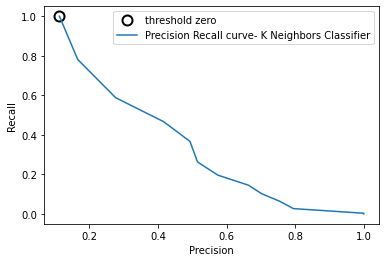

In [80]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, grid_search_knn.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_knn))

plt.plot(precision_knn[close_zero], recall_knn[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_knn, recall_knn, label="Precision Recall curve- K Neighbors Classifier")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

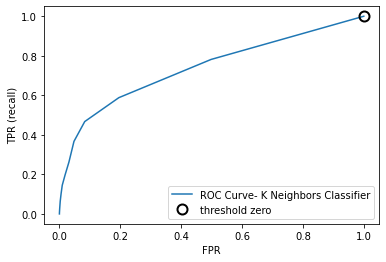

In [81]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, grid_search_knn.predict_proba(X_test)[:, 1])

plt.plot(fpr_knn, tpr_knn, label="ROC Curve- K Neighbors Classifier")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_knn))
plt.plot(fpr_knn[close_zero], tpr_knn[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Logistic Regression

## Hyperparameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
             
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [83]:
from sklearn.linear_model import LogisticRegression

grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=500, penalty='l2'), param_grid, cv=5, return_train_score=True, scoring= f2score, n_jobs= -1, verbose = 4)


In [84]:
grid_search_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [85]:
print("Best parameters: {}".format(grid_search_logreg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_logreg.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.27


In [86]:
# convert to DataFrame
results_logreg = pd.DataFrame(grid_search_logreg.cv_results_)
# show the first 5 rows
display(results_logreg.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.367598,0.029153,0.008400,0.001355,0.001,{'C': 0.001},0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.598397,0.045355,0.007200,0.000748,0.01,{'C': 0.01},0.212336,0.219669,0.185248,0.212766,...,0.207318,0.011790,6,0.209355,0.203097,0.214895,0.209178,0.207593,0.208824,0.003783
2,1.003799,0.195815,0.007599,0.001201,0.1,{'C': 0.1},0.258364,0.267087,0.227349,0.250000,...,0.249357,0.013484,5,0.255568,0.242804,0.249042,0.251290,0.246332,0.249007,0.004334
3,2.284599,0.348471,0.006204,0.000399,1,{'C': 1},0.269066,0.278694,0.235078,0.264813,...,0.263262,0.014817,4,0.272592,0.260408,0.268042,0.268537,0.259993,0.265914,0.004927
4,4.146599,0.701529,0.006000,0.000896,10,{'C': 10},0.276225,0.281343,0.247426,0.269332,...,0.269832,0.011838,3,0.278922,0.268381,0.273028,0.273537,0.266336,0.272041,0.004393


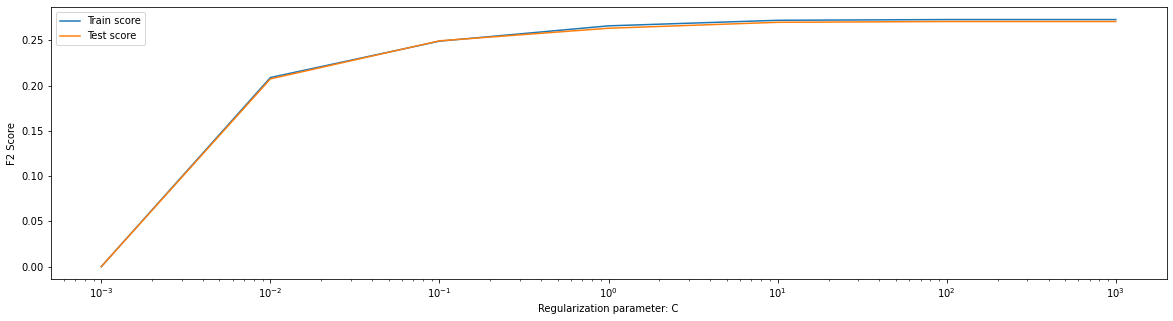

In [87]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_logreg.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_logreg.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F2 Score')
plt.xscale('log')

In [88]:
print('Train score: {:.4f}'.format(grid_search_logreg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_logreg.score(X_test, y_test)))

Train score: 0.2719
Test score: 0.2454


In [89]:
pred_logreg = grid_search_logreg.predict(X_test)

## Model Evaluation

In [90]:
from sklearn.metrics import confusion_matrix

confusion_logreg = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion_logreg))

Confusion matrix:
[[8986  153]
 [ 911  247]]


In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_logreg, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.62      0.21      0.32      1158

    accuracy                           0.90     10297
   macro avg       0.76      0.60      0.63     10297
weighted avg       0.88      0.90      0.87     10297



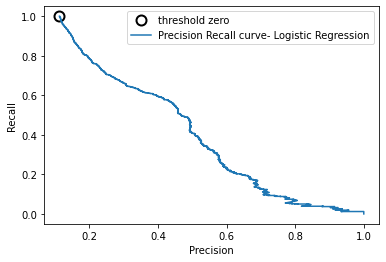

In [92]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, grid_search_logreg.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_logreg))

plt.plot(precision_logreg[close_zero], recall_logreg[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_logreg, recall_logreg, label="Precision Recall curve- Logistic Regression")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

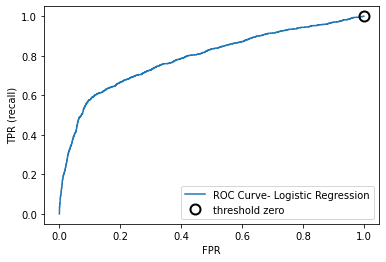

In [93]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, grid_search_logreg.predict_proba(X_test)[:, 1])

plt.plot(fpr_logreg, tpr_logreg, label="ROC Curve- Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_logreg))
plt.plot(fpr_logreg[close_zero], tpr_logreg[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Linear SVC

## Hyperparameter Tuning

In [94]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10]}


In [95]:
from sklearn.svm import LinearSVC

grid_search_linsvc = GridSearchCV(LinearSVC(), param_grid, cv=5, return_train_score=True, scoring= f2score, n_jobs= -1, verbose = 4)


In [96]:
grid_search_linsvc.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [97]:
print("Best parameters: {}".format(grid_search_linsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_linsvc.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.26


In [98]:
# convert to DataFrame
results_linsvc = pd.DataFrame(grid_search_linsvc.cv_results_)
# show the first 5 rows
display(results_linsvc.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.229990,0.017577,0.006201,0.001939,0.001,{'C': 0.001},0.214021,0.219595,0.188455,0.220762,...,0.210205,0.011758,5,0.210130,0.208386,0.217263,0.209953,0.209637,0.211074,0.003154
1,0.260201,0.015381,0.004998,0.000003,0.01,{'C': 0.01},0.246749,0.254915,0.222930,0.245573,...,0.243115,0.010688,4,0.244554,0.237797,0.247331,0.241316,0.241039,0.242407,0.003261
2,0.660999,0.015492,0.005200,0.000400,0.1,{'C': 0.1},0.255390,0.263857,0.225904,0.254915,...,0.250046,0.012852,3,0.261169,0.245163,0.251520,0.249146,0.245204,0.250441,0.005886
3,5.481999,1.086954,0.004001,0.000895,1,{'C': 1},0.262810,0.271433,0.233723,0.263769,...,0.259206,0.013104,1,0.265949,0.252370,0.258678,0.256251,0.255026,0.257655,0.004618
4,8.797182,0.662516,0.003390,0.001023,10,{'C': 10},0.262810,0.268568,0.240000,0.262197,...,0.258663,0.009770,2,0.266407,0.249001,0.260996,0.253638,0.251206,0.256250,0.006488


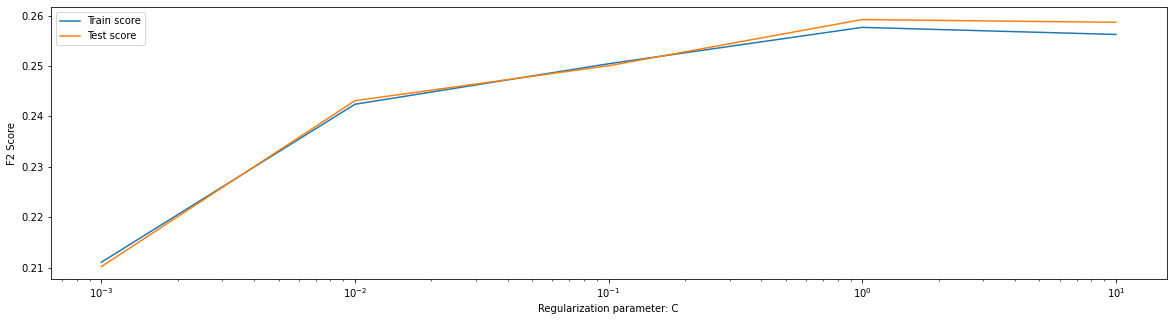

In [100]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_linsvc.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_linsvc.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F2 Score')
plt.xscale('log')

In [101]:
print('Train score: {:.4f}'.format(grid_search_linsvc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_linsvc.score(X_test, y_test)))

Train score: 0.2584
Test score: 0.2394


In [102]:
pred_linsvc = grid_search_linsvc.predict(X_test)

## Model Evaluation

In [103]:
from sklearn.metrics import confusion_matrix

confusion_linsvc = confusion_matrix(y_test, pred_linsvc)
print("Confusion matrix:\n{}".format(confusion_linsvc))

Confusion matrix:
[[8998  141]
 [ 918  240]]


In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_linsvc, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.63      0.21      0.31      1158

    accuracy                           0.90     10297
   macro avg       0.77      0.60      0.63     10297
weighted avg       0.88      0.90      0.87     10297



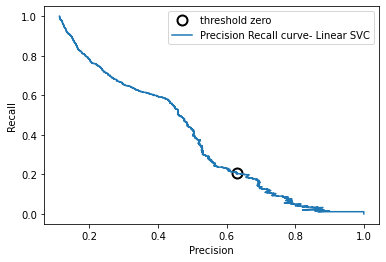

In [105]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_linsvc, recall_linsvc, thresholds_linsvc = precision_recall_curve(y_test, grid_search_linsvc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_linsvc))

plt.plot(precision_linsvc[close_zero], recall_linsvc[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_linsvc, recall_linsvc, label="Precision Recall curve- Linear SVC")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

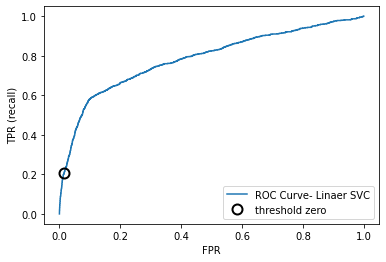

In [107]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_linsvc, tpr_linsvc, thresholds_linsvc = roc_curve(y_test, grid_search_linsvc.decision_function(X_test))

plt.plot(fpr_linsvc, tpr_linsvc, label="ROC Curve- Linaer SVC")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_linsvc))
plt.plot(fpr_linsvc[close_zero], tpr_linsvc[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# SVC(kernel = 'linear')

## Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]} 

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.1, 1, 10]}


In [65]:
from sklearn.svm import SVC

grid_search_ksvclin = GridSearchCV(SVC(kernel = 'linear', cache_size =14000), param_grid, cv=2, return_train_score=True, scoring= f2score, n_jobs= -1, verbose = 4)

In [66]:
grid_search_ksvclin.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, estimator=SVC(cache_size=14000, kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10]}, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=4)

In [67]:
print("Best parameters: {}".format(grid_search_ksvclin.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ksvclin.best_score_))

Best parameters: {'C': 0.1}
Best cross-validation score: 0.25


In [68]:
# convert to DataFrame
results_ksvclin = pd.DataFrame(grid_search_ksvclin.cv_results_)
# show the first 5 rows
display(results_ksvclin.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,106.617568,23.064753,2.372501,0.224500,0.1,{'C': 0.1},0.2501,0.2405,0.2453,0.0048,1,0.2405,0.2501,0.2453,0.0048
1,440.604814,66.177901,3.006227,0.128907,1,{'C': 1},0.2501,0.2405,0.2453,0.0048,1,0.2405,0.2501,0.2453,0.0048
2,3298.628675,537.779681,3.010649,0.128353,10,{'C': 10},0.2501,0.2405,0.2453,0.0048,1,0.2405,0.2501,0.2453,0.0048


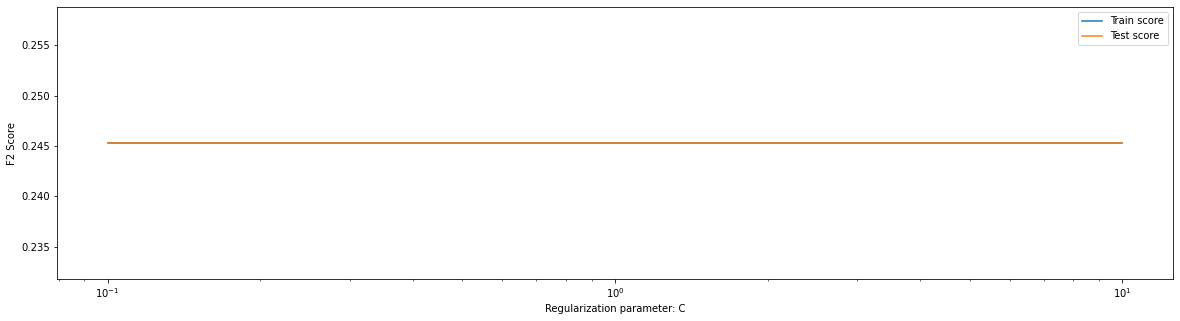

In [69]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_ksvclin.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_ksvclin.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F2 Score')
plt.xscale('log')

In [70]:
print('Train score: {:.4f}'.format(grid_search_ksvclin.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_ksvclin.score(X_test, y_test)))

Train score: 0.2453
Test score: 0.2275


In [71]:
pred_ksvclin = grid_search_ksvclin.predict(X_test)

## Model Evaluation

In [72]:
from sklearn.metrics import confusion_matrix

confusion_ksvclin = confusion_matrix(y_test, pred_ksvclin)
print("Confusion matrix:\n{}".format(confusion_ksvclin))

Confusion matrix:
[[8987  152]
 [ 930  228]]


In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvclin, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.60      0.20      0.30      1158

    accuracy                           0.89     10297
   macro avg       0.75      0.59      0.62     10297
weighted avg       0.87      0.89      0.87     10297



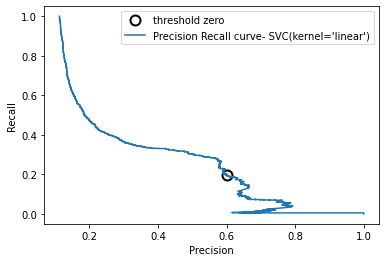

In [74]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ksvclin, recall_ksvclin, thresholds_ksvclin = precision_recall_curve(y_test, grid_search_ksvclin.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvclin))

plt.plot(precision_ksvclin[close_zero], recall_ksvclin[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ksvclin, recall_ksvclin, label="Precision Recall curve- SVC(kernel='linear')")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

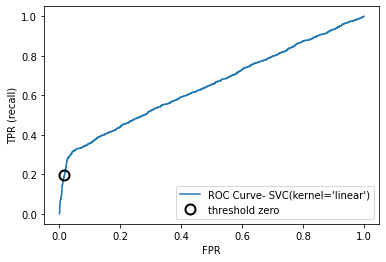

In [75]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ksvclin, tpr_ksvclin, thresholds_ksvclin = roc_curve(y_test, grid_search_ksvclin.decision_function(X_test))

plt.plot(fpr_ksvclin, tpr_ksvclin, label="ROC Curve- SVC(kernel='linear')")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvclin))
plt.plot(fpr_ksvclin[close_zero], tpr_ksvclin[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# SVC(kernel = 'poly')

## Hyperparameter Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV

#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}   -Best C= 1

#Rerun with reduced param set
#param_grid = {'C': [0.7, 1, 1.5, 2]}
param_grid = {'C': [0.7, 1, 1.5, 2]}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.7, 1, 1.5, 2]}


In [67]:
from sklearn.svm import SVC

random_search_ksvcpoly = RandomizedSearchCV(SVC(kernel= 'poly', degree=3, cache_size= 14000), param_grid, cv= 2, scoring =f2score, return_train_score=True, n_jobs= -1, verbose = 4)

In [68]:
random_search_ksvcpoly.fit(X_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits


RandomizedSearchCV(cv=2, estimator=SVC(cache_size=14000, kernel='poly'),
                   n_jobs=-1, param_distributions={'C': [0.7, 1, 1.5, 2]},
                   return_train_score=True,
                   scoring=make_scorer(fbeta_score, beta=2), verbose=4)

In [69]:
print("Best parameters: {}".format(random_search_ksvcpoly.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search_ksvcpoly.best_score_))

Best parameters: {'C': 2}
Best cross-validation score: 0.29


In [70]:
# convert to DataFrame
results_ksvcpoly = pd.DataFrame(random_search_ksvcpoly.cv_results_)
# show the first 5 rows
display(results_ksvcpoly.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,98.727380,1.001053,5.127539,0.525986,0.7,{'C': 0.7},0.262637,0.234626,0.248631,0.014006,4,0.291044,0.255708,0.273376,0.017668
1,112.004582,7.034624,3.604524,0.924529,1,{'C': 1},0.291585,0.242731,0.267158,0.024427,3,0.317137,0.288219,0.302678,0.014459
2,125.001519,2.986246,2.242613,0.295614,1.5,{'C': 1.5},0.309992,0.257158,0.283575,0.026417,2,0.342510,0.327275,0.334893,0.007618
3,130.193757,1.468002,1.932485,0.040484,2,{'C': 2},0.317215,0.263471,0.290343,0.026872,1,0.359745,0.342178,0.350961,0.008784


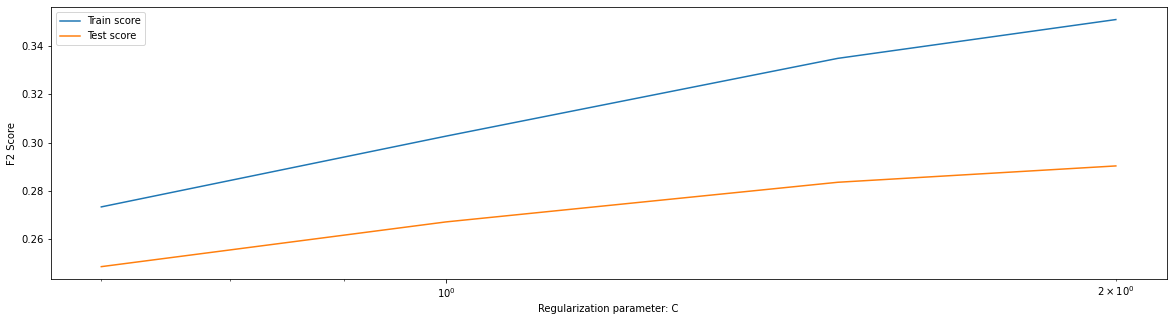

In [71]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_ksvcpoly.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_ksvcpoly.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F2 Score')
plt.xscale('log')

In [73]:
print('Train score: {:.4f}'.format(random_search_ksvcpoly.score(X_train, y_train)))
print('Test score: {:.4f}'.format(random_search_ksvcpoly.score(X_test, y_test)))

Train score: 0.3354
Test score: 0.2777


In [74]:
pred_ksvcpoly = random_search_ksvcpoly.predict(X_test)

## Model Evaluation

In [75]:
from sklearn.metrics import confusion_matrix

confusion_ksvcpoly = confusion_matrix(y_test, pred_ksvcpoly)
print("Confusion matrix:\n{}".format(confusion_ksvcpoly))

Confusion matrix:
[[8976  163]
 [ 876  282]]


In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvcpoly, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.95      9139
         yes       0.63      0.24      0.35      1158

    accuracy                           0.90     10297
   macro avg       0.77      0.61      0.65     10297
weighted avg       0.88      0.90      0.88     10297



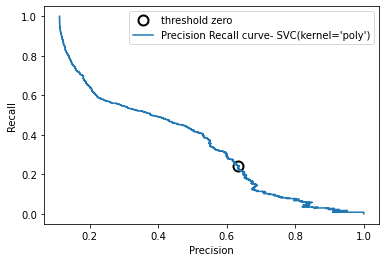

In [77]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ksvcpoly, recall_ksvcpoly, thresholds_ksvcpoly = precision_recall_curve(y_test, random_search_ksvcpoly.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcpoly))

plt.plot(precision_ksvcpoly[close_zero], recall_ksvcpoly[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ksvcpoly, recall_ksvcpoly, label="Precision Recall curve- SVC(kernel='poly')")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

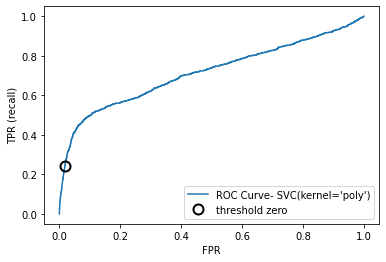

In [78]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ksvcpoly, tpr_ksvcpoly, thresholds_ksvcpoly = roc_curve(y_test, random_search_ksvcpoly.decision_function(X_test))

plt.plot(fpr_ksvcpoly, tpr_ksvcpoly, label="ROC Curve- SVC(kernel='poly')")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcpoly))
plt.plot(fpr_ksvcpoly[close_zero], tpr_ksvcpoly[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# SVC(kernel = 'rbf')

## Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}


In [80]:
from sklearn.svm import SVC

grid_search_ksvcrbf = GridSearchCV(SVC(kernel = 'rbf', cache_size =14000), param_grid, cv=2, scoring= f2score, return_train_score=True, n_jobs= -1, verbose = 4)

In [81]:
grid_search_ksvcrbf.fit(X_train, y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


GridSearchCV(cv=2, estimator=SVC(cache_size=14000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [82]:
print("Best parameters: {}".format(grid_search_ksvcrbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ksvcrbf.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.29


In [83]:
# convert to DataFrame
results_ksvcrbf = pd.DataFrame(grid_search_ksvcrbf.cv_results_)
# show the first 5 rows
display(results_ksvcrbf.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,15.530499,0.011501,15.303999,0.089000,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0
1,16.935000,1.600003,16.094499,0.876499,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0
2,17.275494,1.447502,17.231999,1.822000,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0
3,16.103499,0.044501,15.630001,0.003999,0.001,1,"{'C': 0.001, 'gamma': 1}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0
4,17.293499,1.448502,17.324000,1.688999,0.001,10,"{'C': 0.001, 'gamma': 10}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0


In [86]:
print('Train score: {:.4f}'.format(grid_search_ksvcrbf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_ksvcrbf.score(X_test, y_test)))

Train score: 0.3935
Test score: 0.2769


In [87]:
pred_ksvcrbf = grid_search_ksvcrbf.predict(X_test)

## Model Evaluation

In [88]:
from sklearn.metrics import confusion_matrix

confusion_ksvcrbf = confusion_matrix(y_test, pred_ksvcrbf)
print("Confusion matrix:\n{}".format(confusion_ksvcrbf))

Confusion matrix:
[[8961  178]
 [ 876  282]]


In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvcrbf, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.61      0.24      0.35      1158

    accuracy                           0.90     10297
   macro avg       0.76      0.61      0.65     10297
weighted avg       0.88      0.90      0.88     10297



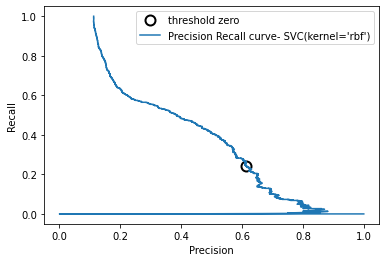

In [90]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ksvcrbf, recall_ksvcrbf, thresholds_ksvcrbf = precision_recall_curve(y_test, grid_search_ksvcrbf.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcrbf))

plt.plot(precision_ksvcrbf[close_zero], recall_ksvcrbf[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ksvcrbf, recall_ksvcrbf, label="Precision Recall curve- SVC(kernel='rbf')")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

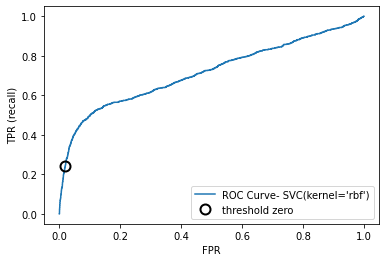

In [91]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ksvcrbf, tpr_ksvcrbf, thresholds_ksvcrbf = roc_curve(y_test, grid_search_ksvcrbf.decision_function(X_test))

plt.plot(fpr_ksvcrbf, tpr_ksvcrbf, label="ROC Curve- SVC(kernel='rbf')")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcrbf))
plt.plot(fpr_ksvcrbf[close_zero], tpr_ksvcrbf[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Decision Tree Classifier

## Hyperparameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90], 
              'criterion': ['entropy','gini']}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90], 'criterion': ['entropy', 'gini']}


In [65]:
from sklearn.tree import DecisionTreeClassifier

grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv=5,scoring= f2score, return_train_score=True, n_jobs= -1, verbose = 4)

In [66]:
grid_search_dtree.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    7.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [67]:
print("Best parameters: {}".format(grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree.best_score_))

Best parameters: {'criterion': 'gini', 'max_depth': 40}
Best cross-validation score: 0.34


In [68]:
# convert to DataFrame
results_dtree = pd.DataFrame(grid_search_dtree.cv_results_)
# show the first 5 rows
display(results_dtree.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.154286,0.008306,0.006031,0.002387,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.259247,0.245000,0.205664,...,0.241747,0.018668,31,0.260360,0.249125,0.239453,0.257955,0.239889,0.249357,0.008750
1,0.181179,0.023587,0.006320,0.003294,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.300388,0.334083,0.262290,...,0.306993,0.025227,25,0.334061,0.318717,0.304963,0.331798,0.311176,0.320143,0.011335
2,0.201223,0.026159,0.007803,0.007260,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.332587,0.304958,0.316947,...,0.309526,0.026889,21,0.357057,0.300977,0.352441,0.287960,0.330200,0.325727,0.027401
3,0.223106,0.024918,0.004779,0.000795,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.311800,0.368020,0.258054,...,0.303089,0.036799,28,0.367682,0.366372,0.338859,0.335939,0.329558,0.347682,0.016084
4,0.205068,0.014030,0.004605,0.002987,entropy,8,"{'criterion': 'entropy', 'max_depth': 8}",0.312201,0.369085,0.302738,...,0.313591,0.028765,16,0.387721,0.403559,0.395208,0.361129,0.360528,0.381629,0.017708


In [69]:
print('Train score: {:.4f}'.format(grid_search_dtree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_dtree.score(X_test, y_test)))

Train score: 0.9605
Test score: 0.3271


In [70]:
dtree = DecisionTreeClassifier(random_state = 0, criterion='gini', max_depth=40)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40, random_state=0)

[Text(100.37561784263679, 214.24235294117648, 'X[12] <= 0.469\ngini = 0.2\nsamples = 30891\nvalue = [27409, 3482]'),
 Text(24.287492642313655, 207.8470588235294, 'X[6] <= 0.514\ngini = 0.493\nsamples = 3767\nvalue = [2103, 1664]'),
 Text(9.80339434443055, 201.45176470588234, 'X[45] <= 0.5\ngini = 0.407\nsamples = 927\nvalue = [264, 663]'),
 Text(5.145632093056178, 195.0564705882353, 'X[9] <= 0.097\ngini = 0.381\nsamples = 749\nvalue = [192, 557]'),
 Text(1.858332350234764, 188.66117647058823, 'X[11] <= 0.052\ngini = 0.471\nsamples = 171\nvalue = [65, 106]'),
 Text(1.2309888398650402, 182.26588235294116, 'X[5] <= 0.045\ngini = 0.434\nsamples = 116\nvalue = [37, 79]'),
 Text(0.7925724936885071, 175.87058823529412, 'X[3] <= 0.5\ngini = 0.413\nsamples = 110\nvalue = [32, 78]'),
 Text(0.1685203973291178, 169.47529411764705, 'X[0] <= 0.296\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.0842601986645589, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2527805959

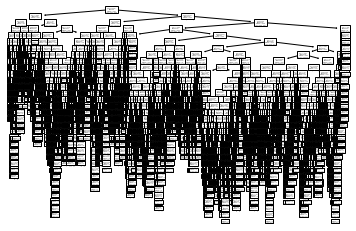

In [71]:
from sklearn import tree
tree.plot_tree(dtree)

In [72]:
pred_dtree = grid_search_dtree.predict(X_test)

## Model Evaluation

In [73]:
from sklearn.metrics import confusion_matrix

confusion_dtree = confusion_matrix(y_test, pred_dtree)
print("Confusion matrix:\n{}".format(confusion_dtree))

Confusion matrix:
[[8300  839]
 [ 775  383]]


In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_dtree, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.91      0.91      9139
         yes       0.31      0.33      0.32      1158

    accuracy                           0.84     10297
   macro avg       0.61      0.62      0.62     10297
weighted avg       0.85      0.84      0.85     10297



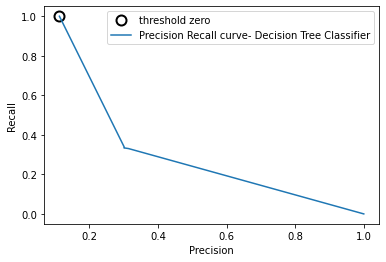

In [75]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_dtree, recall_dtree, thresholds_dtree = precision_recall_curve(y_test, dtree.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_dtree))

plt.plot(precision_dtree[close_zero], recall_dtree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_dtree, recall_dtree, label="Precision Recall curve- Decision Tree Classifier")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

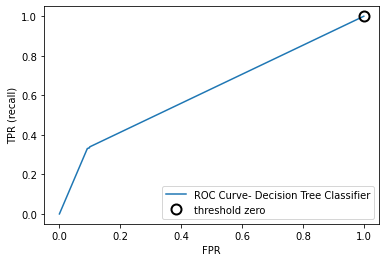

In [76]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, dtree.predict_proba(X_test)[:, 1])

plt.plot(fpr_dtree, tpr_dtree, label="ROC Curve- Decision Tree Classifier")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_dtree))
plt.plot(fpr_dtree[close_zero], tpr_dtree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Comparing Models

Comparing all models for f2score

In [272]:
print("K Neighbors Classifier:      Train score: {0:.4f}  Test score: {1:.4f}".format(grid_search_knn.score(X_train, y_train),grid_search_knn.score(X_test, y_test)))
print("Logistic Regression:         Train score: {0:.4f}  Test score: {1:.4f}".format(grid_search_logreg.score(X_train, y_train),grid_search_logreg.score(X_test, y_test)))
print("Linear SVC:                  Train score: {0:.4f}  Test score: {1:.4f}".format(grid_search_linsvc.score(X_train, y_train),grid_search_linsvc.score(X_test, y_test)))
print("SVC(kernel='linear'):        Train score: {0:.4f}  Test score: {1:.4f}".format(grid_search_ksvclin.score(X_train, y_train),grid_search_ksvclin.score(X_test, y_test)))
print("SVC(kernel='poly'):          Train score: {0:.4f}  Test score: {1:.4f}".format(random_search_ksvcpoly.score(X_train, y_train),random_search_ksvcpoly.score(X_test, y_test)))
print("SVC(kernel='rbf'):           Train score: {0:.4f}  Test score: {1:.4f}".format(grid_search_ksvcrbf.score(X_train, y_train),grid_search_ksvcrbf.score(X_test, y_test)))
print("Decision Tree:               Train score: {0:.4f}  Test score: {1:.4f}".format(grid_search_dtree.score(X_train, y_train),grid_search_dtree.score(X_test, y_test)))

K Neighbors Classifier:         Train score: 0.2906  Test score: 0.2258
Logistic Regression:            Train score: 0.2719  Test score: 0.2454
Linear SVC:                     Train score: 0.2584  Test score: 0.2394
SVC(kernel = 'linear'):         Train score: 0.2453  Test score: 0.2275
SVC(kernel = 'poly'):           Train score: 0.3354  Test score: 0.2777
SVC(kernel = 'rbf'):            Train score: 0.3935  Test score: 0.2769
Decision Tree Classifier:       Train score: 0.9605  Test score: 0.3271


## Best Model -Project 1
The decision tree model is the best model with the highest score as shown above.

# PROJECT 2

# Voting Classifier - Hard

In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [146]:
log_clf = LogisticRegression(C = 100, max_iter=500, penalty='l2', n_jobs =-1, verbose = 4 )
log_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.1s finished


LogisticRegression(C=100, max_iter=500, n_jobs=-1, verbose=4)

In [147]:
knn_clf = KNeighborsClassifier(n_neighbors = 11, n_jobs =-1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [148]:
svm_clf = SVC(C = 10, gamma = 0.1, probability = True, kernel = 'rbf', cache_size =14000, verbose = 4)
svm_clf.fit(X_train, y_train)

[LibSVM]

SVC(C=10, cache_size=14000, gamma=0.1, probability=True, verbose=4)

In [149]:
voting_hard = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard',n_jobs =-1, verbose = 4)
voting_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=100, max_iter=500, n_jobs=-1,
                                                 verbose=4)),
                             ('knn',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=11)),
                             ('svc',
                              SVC(C=10, cache_size=14000, gamma=0.1,
                                  probability=True, verbose=4))],
                 n_jobs=-1, verbose=4)

In [150]:
for clf in (log_clf, knn_clf, svm_clf, voting_hard):
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, fbeta_score(y_test, y_pred, beta=2))

LogisticRegression 0.24542925278219396
KNeighborsClassifier 0.22483087942697974
SVC 0.27690494893951295
VotingClassifier 0.24232149980055845


In [151]:
pred_voting_hard_train = voting_hard.predict(X_train)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_voting_hard_train, beta=2)))

pred_voting_hard_test = voting_hard.predict(X_test)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_voting_hard_test, beta=2)))

Train score: 0.3014
Test score: 0.2423


## Model Evaluation

In [152]:
from sklearn.metrics import confusion_matrix

confusion_voting_hard = confusion_matrix(y_test, pred_voting_hard_test)
print("Confusion matrix:\n{}".format(confusion_voting_hard))

Confusion matrix:
[[9000  139]
 [ 915  243]]


In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_voting_hard_test, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.64      0.21      0.32      1158

    accuracy                           0.90     10297
   macro avg       0.77      0.60      0.63     10297
weighted avg       0.88      0.90      0.87     10297



# Voting Classifier - Soft

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [155]:
log_clf = LogisticRegression(C = 100, max_iter=500, penalty='l2', n_jobs =-1, verbose = 4 )
log_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.9s finished


LogisticRegression(C=100, max_iter=500, n_jobs=-1, verbose=4)

In [156]:
knn_clf = KNeighborsClassifier(n_neighbors = 11, n_jobs =-1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [157]:
svm_clf = SVC(C = 10, gamma = 0.1, probability = True, kernel = 'rbf', cache_size =14000, verbose = 4)
svm_clf.fit(X_train, y_train)

[LibSVM]

SVC(C=10, cache_size=14000, gamma=0.1, probability=True, verbose=4)

In [158]:
voting_soft = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft',n_jobs =-1, verbose = 4)
voting_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=100, max_iter=500, n_jobs=-1,
                                                 verbose=4)),
                             ('knn',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=11)),
                             ('svc',
                              SVC(C=10, cache_size=14000, gamma=0.1,
                                  probability=True, verbose=4))],
                 n_jobs=-1, verbose=4, voting='soft')

In [159]:
for clf in (log_clf, knn_clf, svm_clf, voting_soft):
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, fbeta_score(y_test, y_pred, beta=2))

LogisticRegression 0.24542925278219396
KNeighborsClassifier 0.22483087942697974
SVC 0.27690494893951295
VotingClassifier 0.2155519742143433


In [160]:
pred_voting_soft_train = voting_soft.predict(X_train)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_voting_soft_train, beta=2)))

pred_voting_soft_test = voting_soft.predict(X_test)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_voting_soft_test, beta=2)))

Train score: 0.2845
Test score: 0.2156


## Model Evaluation

In [161]:
from sklearn.metrics import confusion_matrix

confusion_voting_soft = confusion_matrix(y_test, pred_voting_soft_test)
print("Confusion matrix:\n{}".format(confusion_voting_soft))

Confusion matrix:
[[9021  118]
 [ 944  214]]


In [162]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_voting_soft_test, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94      9139
         yes       0.64      0.18      0.29      1158

    accuracy                           0.90     10297
   macro avg       0.77      0.59      0.62     10297
weighted avg       0.88      0.90      0.87     10297



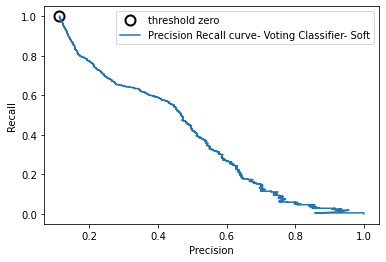

In [163]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_voting_soft, recall_voting_soft, thresholds_voting_soft = precision_recall_curve(y_test, voting_soft.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_voting_soft))

plt.plot(precision_voting_soft[close_zero], recall_voting_soft[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_voting_soft, recall_voting_soft, label="Precision Recall curve- Voting Classifier- Soft")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

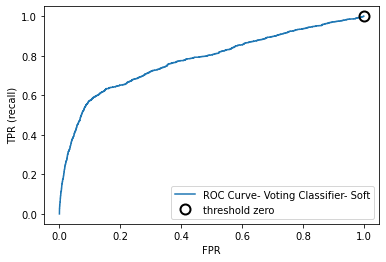

In [164]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_voting_soft, tpr_voting_soft, thresholds_voting_soft = roc_curve(y_test, voting_soft.predict_proba(X_test)[:, 1])

plt.plot(fpr_voting_soft, tpr_voting_soft, label="ROC Curve- Voting Classifier- Soft")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_voting_soft))
plt.plot(fpr_voting_soft[close_zero], tpr_voting_soft[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Bagging -Logistic Regression

In [106]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [107]:
log_clf = LogisticRegression(C = 100, max_iter=500, penalty='l2', n_jobs =-1, verbose = 4 )
bag_log = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0, verbose =4)
bag_log.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.2min remaining:  3.6min
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  1.2min remaining:   44.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.3min finished


BaggingClassifier(base_estimator=LogisticRegression(C=100, max_iter=500,
                                                    n_jobs=-1, verbose=4),
                  max_samples=100, n_estimators=500, n_jobs=-1, random_state=0,
                  verbose=4)

In [108]:
pred_bag_log_train = bag_log.predict(X_train)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_bag_log_train, beta=2)))

pred_bag_log_test = bag_log.predict(X_test)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_bag_log_test, beta=2)))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.0s remaining:    3.3s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.2s finished


Train score: 0.1934


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Test score: 0.1868


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.4s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s finished


## Model Evaluation

In [112]:
from sklearn.metrics import confusion_matrix

confusion_bag_log = confusion_matrix(y_test, pred_bag_log_test)
print("Confusion matrix:\n{}".format(confusion_bag_log))

Confusion matrix:
[[9055   84]
 [ 975  183]]


In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_bag_log_test, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.69      0.16      0.26      1158

    accuracy                           0.90     10297
   macro avg       0.79      0.57      0.60     10297
weighted avg       0.88      0.90      0.87     10297



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.3s remaining:    1.2s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.5s finished


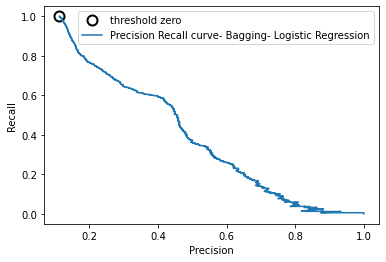

In [114]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_bag_log, recall_bag_log, thresholds_bag_log = precision_recall_curve(y_test, bag_log.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_bag_log))

plt.plot(precision_bag_log[close_zero], recall_bag_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_bag_log, recall_bag_log, label="Precision Recall curve- Bagging- Logistic Regression")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.3s remaining:    1.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s finished


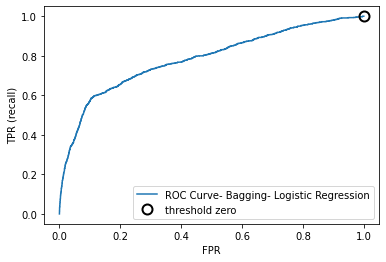

In [115]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_bag_log, tpr_bag_log, thresholds_bag_log = roc_curve(y_test, bag_log.predict_proba(X_test)[:, 1])

plt.plot(fpr_bag_log, tpr_bag_log, label="ROC Curve- Bagging- Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_bag_log))
plt.plot(fpr_bag_log[close_zero], tpr_bag_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Bagging -Random Forest

In [222]:
from sklearn.ensemble import RandomForestClassifier

bag_rnd = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0, verbose = 4)
bag_rnd.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


building tree 1 of 500building tree 2 of 500building tree 3 of 500

building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500

building tree 8 of 500
building tree 9 of 500
building tree 10 of 500building tree 11 of 500
building tree 12 of 500
building tree 13 of 500

building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500building tree 24 of 500

building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500building tree 40 of 500

building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.3s


building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500building tree 136 of 500

building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500building tree 143 of 500

building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500building tree 149 of 500

building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500building tree 159 of 500

building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500building tree 165 of 500

building tree 166 of 500b

[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.8s


building tree 259 of 500

building tree 260 of 500
building tree 261 of 500
building tree 262 of 500
building tree 263 of 500
building tree 264 of 500
building tree 265 of 500
building tree 266 of 500building tree 267 of 500building tree 268 of 500


building tree 269 of 500
building tree 270 of 500
building tree 271 of 500
building tree 272 of 500
building tree 273 of 500
building tree 274 of 500
building tree 275 of 500
building tree 276 of 500
building tree 277 of 500
building tree 278 of 500
building tree 279 of 500
building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500building tree 295 of 500

building tree 296 of 500building tree 297 of 500

building tree 298 of 500

[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.6s


building tree 396 of 500
building tree 397 of 500
building tree 398 of 500building tree 399 of 500

building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500
building tree 413 of 500building tree 414 of 500

building tree 415 of 500
building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500building tree 425 of 500

building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500building tree 433 of 500

building tree 434 of 500building tree 435 of 500bu

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=4)

In [223]:
pred_bag_rnd_train = bag_rnd.predict(X_train)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_bag_rnd_train, beta=2)))

pred_bag_rnd_test = bag_rnd.predict(X_test)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_bag_rnd_test, beta=2)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s


Train score: 0.2218
Test score: 0.2102


[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


In [224]:
for name, score in zip(X_train_cols, bag_rnd.feature_importances_):
    print(name, score)

age 0.01817941847846866
default 0.0
housing 0.00015539656505450208
loan 0.00011375798855882173
contact 0.012119118032654827
campaign 0.0020834915981622574
pdays 0.13475023244801074
previous 0.02652013744923359
emp.var.rate 0.08967740503109696
cons.price.idx 0.05659930266217335
cons.conf.idx 0.07447541348253983
euribor3m 0.19308821766193004
nr.employed 0.1941941131689894
job_admin. 0.000236797500363456
job_blue-collar 0.0020332494263427567
job_entrepreneur 5.65009273650811e-05
job_housemaid 7.477794109382878e-05
job_management 1.6241674076328503e-05
job_retired 0.001925117611918117
job_self-employed 3.693823402217343e-05
job_services 0.00021149002103886493
job_student 0.0013651099593864223
job_technician 0.0003649279811593681
job_unemployed 0.0001404938643356794
marital_divorced 0.00014994466259795393
marital_married 0.0003155444540694354
marital_single 0.0008296363119001456
education_basic.4y 0.0001466734956828345
education_basic.6y 6.169518209618709e-05
education_basic.9y 0.0004981992

([<matplotlib.axis.YTick at 0x273167cf520>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'default'),
  Text(0, 2, 'housing'),
  Text(0, 3, 'loan'),
  Text(0, 4, 'contact'),
  Text(0, 5, 'campaign'),
  Text(0, 6, 'pdays'),
  Text(0, 7, 'previous'),
  Text(0, 8, 'emp.var.rate'),
  Text(0, 9, 'cons.price.idx'),
  Text(0, 10, 'cons.conf.idx'),
  Text(0, 11, 'euribor3m'),
  Text(0, 12, 'nr.employed'),
  Text(0, 13, 'job_admin.'),
  Text(0, 14, 'job_blue-collar'),
  Text(0, 15, 'job_entrepreneur'),
  Text(0, 16, 'job_housemaid'),
  Text(0, 17, 'job_management'),
  Text(0, 18, 'job_retired'),
  Text(0, 19, 'job_self-employed'),
  Text(0, 20, 'job_services'),
  Text(0, 21, 'job_student'),
  Text(0, 22, 'job_technician'),
  Text(0, 23, 'job_unemployed'),
  Text(0, 24, 'marital_divorced'),
  Text(0, 25, 'marital_married'),
  Text(0, 26, 'marital_single'),
  Text(0, 27, 'education_basic.4y'),
  Text(0, 28, 'education_basic.6y'),
  Text(0, 29, 'education_basic.9y'),
  Text(0, 30, 'education_high.school'),
  

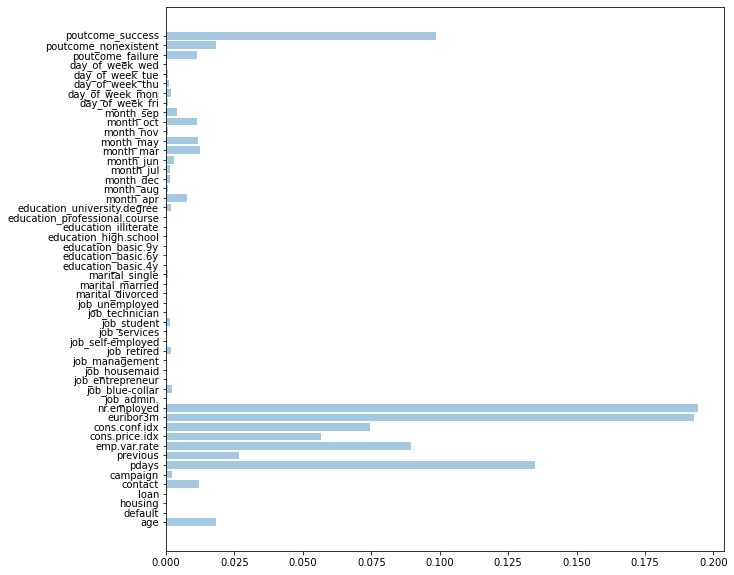

In [225]:
%matplotlib inline

plt.rc('figure', figsize=(10, 10))

y_list = bag_rnd.feature_importances_
y_pos = np.arange(len(y_list))
features = X_train_cols
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

## Model Evaluation

In [226]:
from sklearn.metrics import confusion_matrix

confusion_bag_rnd= confusion_matrix(y_test, pred_bag_rnd_test)
print("Confusion matrix:\n{}".format(confusion_bag_rnd))

Confusion matrix:
[[9032  107]
 [ 950  208]]


In [227]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_bag_rnd_test, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.66      0.18      0.28      1158

    accuracy                           0.90     10297
   macro avg       0.78      0.58      0.61     10297
weighted avg       0.88      0.90      0.87     10297



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


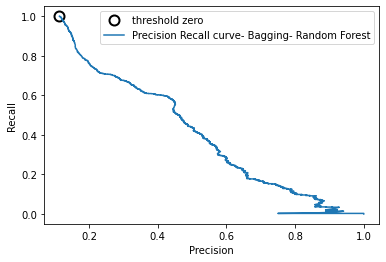

In [228]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_bag_rnd, recall_bag_rnd, thresholds_bag_rnd = precision_recall_curve(y_test, bag_rnd.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_bag_rnd))

plt.plot(precision_bag_rnd[close_zero], recall_bag_rnd[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_bag_rnd, recall_bag_rnd, label="Precision Recall curve- Bagging- Random Forest")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


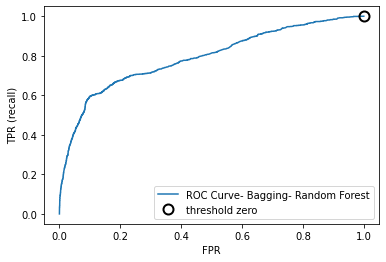

In [229]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_bag_rnd, tpr_bag_rnd, thresholds_bag_rnd = roc_curve(y_test, bag_rnd.predict_proba(X_test)[:, 1])

plt.plot(fpr_bag_rnd, tpr_bag_rnd, label="ROC Curve- Bagging- Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_bag_rnd))
plt.plot(fpr_bag_rnd[close_zero], tpr_bag_rnd[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Pasting - Logistic Regression

In [230]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [231]:
log_clf = LogisticRegression(C = 100, max_iter=500, penalty='l2', n_jobs =-1, verbose = 4 )
pst_log = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0, verbose =4)
pst_log.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.2min remaining:  3.5min
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  1.2min remaining:   43.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.2min finished


BaggingClassifier(base_estimator=LogisticRegression(C=100, max_iter=500,
                                                    n_jobs=-1, verbose=4),
                  bootstrap=False, max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=0, verbose=4)

In [232]:
pred_pst_log_train = pst_log.predict(X_train)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_pst_log_train, beta=2)))

pred_pst_log_test = pst_log.predict(X_test)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_pst_log_test, beta=2)))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.0s remaining:    3.3s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.2s finished


Train score: 0.1934


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Test score: 0.1878


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.4s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.5s finished


## Model Evaluation

In [236]:
from sklearn.metrics import confusion_matrix

confusion_pst_log = confusion_matrix(y_test, pred_pst_log_test)
print("Confusion matrix:\n{}".format(confusion_pst_log))

Confusion matrix:
[[9056   83]
 [ 974  184]]


In [237]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_pst_log_test, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.69      0.16      0.26      1158

    accuracy                           0.90     10297
   macro avg       0.80      0.57      0.60     10297
weighted avg       0.88      0.90      0.87     10297



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.3s remaining:    1.2s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s finished


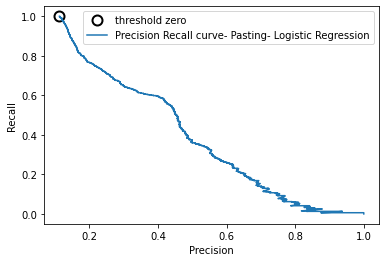

In [238]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_pst_log, recall_pst_log, thresholds_pst_log = precision_recall_curve(y_test, pst_log.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_pst_log))

plt.plot(precision_pst_log[close_zero], recall_pst_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_pst_log, recall_pst_log, label="Precision Recall curve- Pasting- Logistic Regression")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.3s remaining:    1.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s finished


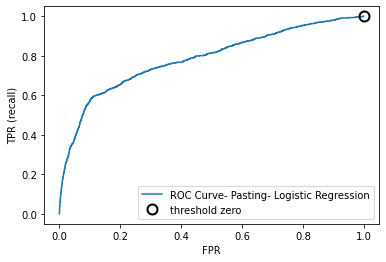

In [239]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_pst_log, tpr_pst_log, thresholds_pst_log = roc_curve(y_test, pst_log.predict_proba(X_test)[:, 1])

plt.plot(fpr_pst_log, tpr_pst_log, label="ROC Curve- Pasting- Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_pst_log))
plt.plot(fpr_pst_log[close_zero], tpr_pst_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Pasting -Random Forest

In [240]:
from sklearn.ensemble import RandomForestClassifier

pst_rnd = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0, verbose = 4, bootstrap = False)
pst_rnd.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500building tree 5 of 500building tree 6 of 500
building tree 7 of 500

building tree 8 of 500

building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500building tree 19 of 500

building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500building tree 36 of 500
building tree 37 of 500

building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.3s


building tree 130 of 500
building tree 131 of 500building tree 132 of 500

building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500building tree 137 of 500

building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500


[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.9s


building tree 252 of 500
building tree 253 of 500building tree 254 of 500

building tree 255 of 500
building tree 256 of 500
building tree 257 of 500
building tree 258 of 500
building tree 259 of 500
building tree 260 of 500
building tree 261 of 500
building tree 262 of 500
building tree 263 of 500
building tree 264 of 500
building tree 265 of 500
building tree 266 of 500
building tree 267 of 500building tree 268 of 500

building tree 269 of 500
building tree 270 of 500
building tree 271 of 500building tree 272 of 500

building tree 273 of 500
building tree 274 of 500
building tree 275 of 500
building tree 276 of 500
building tree 277 of 500
building tree 278 of 500building tree 279 of 500

building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.7s


building tree 409 of 500
building tree 410 of 500building tree 411 of 500

building tree 412 of 500
building tree 413 of 500
building tree 414 of 500building tree 415 of 500

building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500building tree 425 of 500

building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500building tree 435 of 500

building tree 436 of 500
building tree 437 of 500
building tree 438 of 500building tree 439 of 500

building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500building tree 445 of 500

building tree 446 of 500
building tree 447 of 500
building tree 448 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.2s finished


RandomForestClassifier(bootstrap=False, max_leaf_nodes=16, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=4)

In [241]:
pred_pst_rnd_train = bag_rnd.predict(X_train)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_pst_rnd_train, beta=2)))

pred_pst_rnd_test = pst_rnd.predict(X_test)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_pst_rnd_test, beta=2)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s


Train score: 0.2218


[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


Test score: 0.2102


In [242]:
for name, score in zip(X_train_cols, bag_rnd.feature_importances_):
    print(name, score)

age 0.01817941847846866
default 0.0
housing 0.00015539656505450208
loan 0.00011375798855882173
contact 0.012119118032654827
campaign 0.0020834915981622574
pdays 0.13475023244801074
previous 0.02652013744923359
emp.var.rate 0.08967740503109696
cons.price.idx 0.05659930266217335
cons.conf.idx 0.07447541348253983
euribor3m 0.19308821766193004
nr.employed 0.1941941131689894
job_admin. 0.000236797500363456
job_blue-collar 0.0020332494263427567
job_entrepreneur 5.65009273650811e-05
job_housemaid 7.477794109382878e-05
job_management 1.6241674076328503e-05
job_retired 0.001925117611918117
job_self-employed 3.693823402217343e-05
job_services 0.00021149002103886493
job_student 0.0013651099593864223
job_technician 0.0003649279811593681
job_unemployed 0.0001404938643356794
marital_divorced 0.00014994466259795393
marital_married 0.0003155444540694354
marital_single 0.0008296363119001456
education_basic.4y 0.0001466734956828345
education_basic.6y 6.169518209618709e-05
education_basic.9y 0.0004981992

([<matplotlib.axis.YTick at 0x27318cb1f40>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'default'),
  Text(0, 2, 'housing'),
  Text(0, 3, 'loan'),
  Text(0, 4, 'contact'),
  Text(0, 5, 'campaign'),
  Text(0, 6, 'pdays'),
  Text(0, 7, 'previous'),
  Text(0, 8, 'emp.var.rate'),
  Text(0, 9, 'cons.price.idx'),
  Text(0, 10, 'cons.conf.idx'),
  Text(0, 11, 'euribor3m'),
  Text(0, 12, 'nr.employed'),
  Text(0, 13, 'job_admin.'),
  Text(0, 14, 'job_blue-collar'),
  Text(0, 15, 'job_entrepreneur'),
  Text(0, 16, 'job_housemaid'),
  Text(0, 17, 'job_management'),
  Text(0, 18, 'job_retired'),
  Text(0, 19, 'job_self-employed'),
  Text(0, 20, 'job_services'),
  Text(0, 21, 'job_student'),
  Text(0, 22, 'job_technician'),
  Text(0, 23, 'job_unemployed'),
  Text(0, 24, 'marital_divorced'),
  Text(0, 25, 'marital_married'),
  Text(0, 26, 'marital_single'),
  Text(0, 27, 'education_basic.4y'),
  Text(0, 28, 'education_basic.6y'),
  Text(0, 29, 'education_basic.9y'),
  Text(0, 30, 'education_high.school'),
  

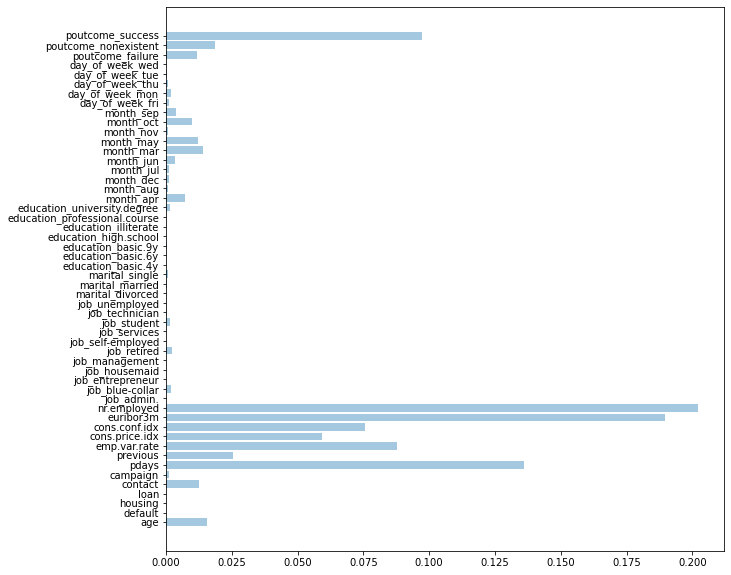

In [243]:
%matplotlib inline

plt.rc('figure', figsize=(10, 10))

y_list = pst_rnd.feature_importances_
y_pos = np.arange(len(y_list))
features = X_train_cols
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

## Model Evaluation

In [244]:
from sklearn.metrics import confusion_matrix

confusion_pst_rnd= confusion_matrix(y_test, pred_pst_rnd_test)
print("Confusion matrix:\n{}".format(confusion_pst_rnd))

Confusion matrix:
[[9032  107]
 [ 950  208]]


In [245]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_pst_rnd_test, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.66      0.18      0.28      1158

    accuracy                           0.90     10297
   macro avg       0.78      0.58      0.61     10297
weighted avg       0.88      0.90      0.87     10297



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.3s finished


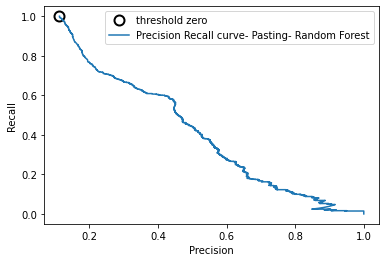

In [246]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_pst_rnd, recall_pst_rnd, thresholds_pst_rnd = precision_recall_curve(y_test, pst_rnd.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_pst_rnd))

plt.plot(precision_pst_rnd[close_zero], recall_pst_rnd[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_pst_rnd, recall_pst_rnd, label="Precision Recall curve- Pasting- Random Forest")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


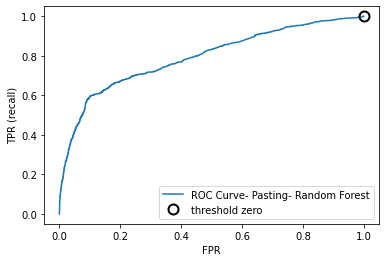

In [247]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_pst_rnd, tpr_pst_rnd, thresholds_pst_rnd = roc_curve(y_test, pst_rnd.predict_proba(X_test)[:, 1])

plt.plot(fpr_pst_rnd, tpr_pst_rnd, label="ROC Curve- Pasting- Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_pst_rnd))
plt.plot(fpr_pst_rnd[close_zero], tpr_pst_rnd[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# AdaBoost - Decision Tree

In [248]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dtree = DecisionTreeClassifier(random_state = 0, criterion='gini'  , max_depth=40)

ada_dtree = AdaBoostClassifier(dtree, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_dtree.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=40,
                                                         random_state=0),
                   learning_rate=0.5, n_estimators=200, random_state=0)

In [251]:
pred_ada_dtree_train = ada_dtree.predict(X_train)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_ada_dtree_train, beta=2)))

pred_ada_dtree_test = ada_dtree.predict(X_test)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_ada_dtree_test, beta=2)))

Train score: 0.9734
Test score: 0.3078


## Model Evaluation

In [252]:
from sklearn.metrics import confusion_matrix

confusion_ada_dtree= confusion_matrix(y_test, pred_ada_dtree_test)
print("Confusion matrix:\n{}".format(confusion_ada_dtree))

Confusion matrix:
[[8801  338]
 [ 832  326]]


In [253]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ada_dtree_test, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.96      0.94      9139
         yes       0.49      0.28      0.36      1158

    accuracy                           0.89     10297
   macro avg       0.70      0.62      0.65     10297
weighted avg       0.87      0.89      0.87     10297



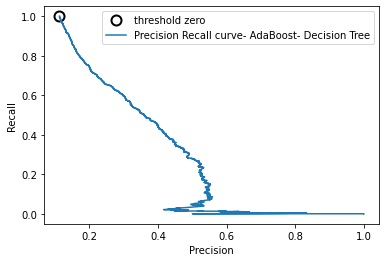

In [254]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ada_dtree, recall_ada_dtree, thresholds_ada_dtree = precision_recall_curve(y_test, ada_dtree.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ada_dtree))

plt.plot(precision_ada_dtree[close_zero], recall_ada_dtree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ada_dtree, recall_ada_dtree, label="Precision Recall curve- AdaBoost- Decision Tree")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

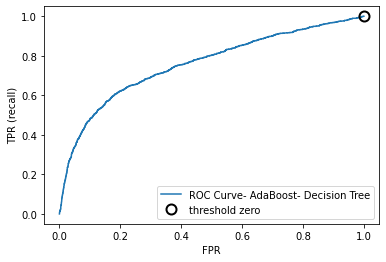

In [255]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ada_dtree, tpr_ada_dtree, thresholds_ada_dtree = roc_curve(y_test, ada_dtree.predict_proba(X_test)[:, 1])

plt.plot(fpr_ada_dtree, tpr_ada_dtree, label="ROC Curve- AdaBoost- Decision Tree")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ada_dtree))
plt.plot(fpr_ada_dtree[close_zero], tpr_ada_dtree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# AdaBoost - Logistic Regression

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

log_clf = LogisticRegression(C = 100, max_iter=500, penalty='l2', n_jobs =-1, verbose = 4 )

ada_log = AdaBoostClassifier(log_clf, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_log.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

AdaBoostClassifier(base_estimator=LogisticRegression(C=100, max_iter=500,
                                                     n_jobs=-1, verbose=4),
                   learning_rate=0.5, n_estimators=200, random_state=0)

In [259]:
pred_ada_log_train = ada_log.predict(X_train)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_ada_log_train, beta=2)))

pred_ada_log_test = ada_log.predict(X_test)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_ada_log_test, beta=2)))

Train score: 0.2664
Test score: 0.2474


## Model Evaluation

In [260]:
from sklearn.metrics import confusion_matrix

confusion_ada_log= confusion_matrix(y_test, pred_ada_log_test)
print("Confusion matrix:\n{}".format(confusion_ada_log))

Confusion matrix:
[[8987  152]
 [ 909  249]]


In [261]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ada_log_test, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.62      0.22      0.32      1158

    accuracy                           0.90     10297
   macro avg       0.76      0.60      0.63     10297
weighted avg       0.88      0.90      0.87     10297



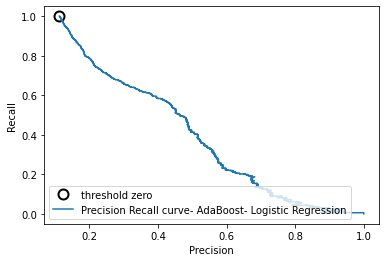

In [262]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ada_log, recall_ada_log, thresholds_ada_log = precision_recall_curve(y_test, ada_log.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ada_log))

plt.plot(precision_ada_log[close_zero], recall_ada_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ada_log, recall_ada_log, label="Precision Recall curve- AdaBoost- Logistic Regression")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

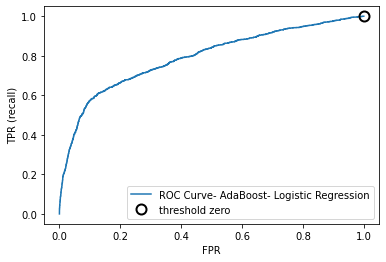

In [263]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ada_log, tpr_ada_log, thresholds_ada_log = roc_curve(y_test, ada_log.predict_proba(X_test)[:, 1])

plt.plot(fpr_ada_log, tpr_ada_log, label="ROC Curve- AdaBoost- Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ada_log))
plt.plot(fpr_ada_log[close_zero], tpr_ada_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Gradient Boosting 

In [264]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier(random_state=0)
gboost.fit(X_train, y_train)

pred_gboost_train = gboost.predict(X_train)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_gboost_train, beta=2)))

pred_gboost_test = gboost.predict(X_test)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_gboost_test, beta=2)))

Train score: 0.3139
Test score: 0.2660


([<matplotlib.axis.YTick at 0x2734dfc8f40>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'default'),
  Text(0, 2, 'housing'),
  Text(0, 3, 'loan'),
  Text(0, 4, 'contact'),
  Text(0, 5, 'campaign'),
  Text(0, 6, 'pdays'),
  Text(0, 7, 'previous'),
  Text(0, 8, 'emp.var.rate'),
  Text(0, 9, 'cons.price.idx'),
  Text(0, 10, 'cons.conf.idx'),
  Text(0, 11, 'euribor3m'),
  Text(0, 12, 'nr.employed'),
  Text(0, 13, 'job_admin.'),
  Text(0, 14, 'job_blue-collar'),
  Text(0, 15, 'job_entrepreneur'),
  Text(0, 16, 'job_housemaid'),
  Text(0, 17, 'job_management'),
  Text(0, 18, 'job_retired'),
  Text(0, 19, 'job_self-employed'),
  Text(0, 20, 'job_services'),
  Text(0, 21, 'job_student'),
  Text(0, 22, 'job_technician'),
  Text(0, 23, 'job_unemployed'),
  Text(0, 24, 'marital_divorced'),
  Text(0, 25, 'marital_married'),
  Text(0, 26, 'marital_single'),
  Text(0, 27, 'education_basic.4y'),
  Text(0, 28, 'education_basic.6y'),
  Text(0, 29, 'education_basic.9y'),
  Text(0, 30, 'education_high.school'),
  

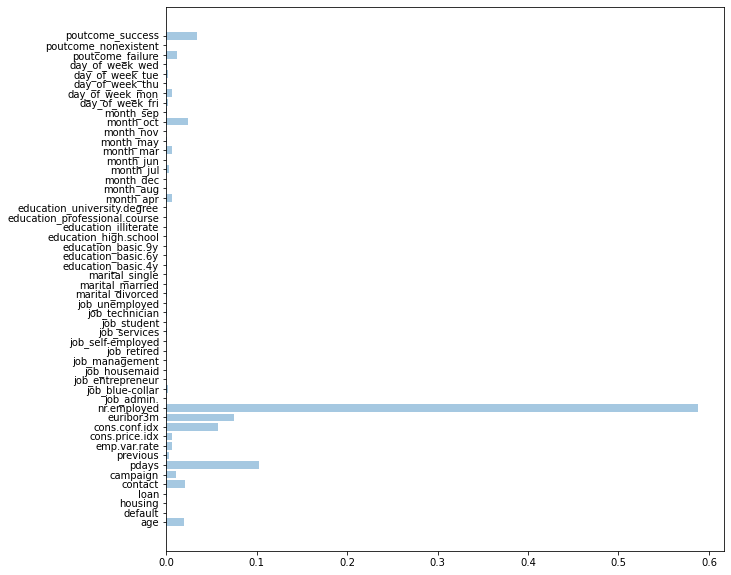

In [265]:
%matplotlib inline
plt.rc('figure', figsize=(10, 10))

y_list = gboost.feature_importances_
y_pos = np.arange(len(y_list))
features = X_train_cols
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

## Model Evaluation

In [266]:
from sklearn.metrics import confusion_matrix

confusion_gboost= confusion_matrix(y_test, pred_gboost_test)
print("Confusion matrix:\n{}".format(confusion_gboost))

Confusion matrix:
[[8983  156]
 [ 889  269]]


In [267]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_gboost_test, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.95      9139
         yes       0.63      0.23      0.34      1158

    accuracy                           0.90     10297
   macro avg       0.77      0.61      0.64     10297
weighted avg       0.88      0.90      0.88     10297



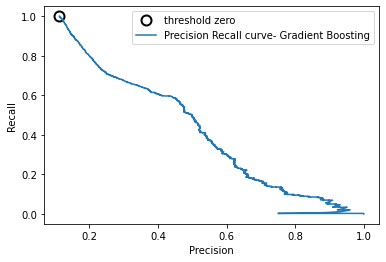

In [268]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_gboost, recall_gboost, thresholds_gboost = precision_recall_curve(y_test, gboost.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_gboost))

plt.plot(precision_gboost[close_zero], recall_gboost[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_gboost, recall_gboost, label="Precision Recall curve- Gradient Boosting")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

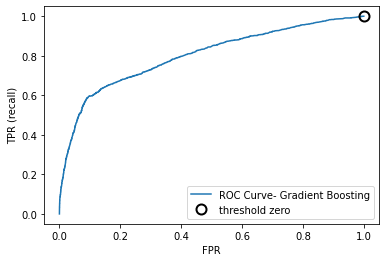

In [269]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_gboost, tpr_gboost, thresholds_gboost = roc_curve(y_test, gboost.predict_proba(X_test)[:, 1])

plt.plot(fpr_gboost, tpr_gboost, label="ROC Curve- Gradient Boosting")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_gboost))
plt.plot(fpr_gboost[close_zero], tpr_gboost[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Principal component analysis 

In [66]:
len(X_train_cols)

52

Total number of features present is 52

In [67]:
from sklearn.decomposition import PCA

Using Principal component analysis for dimensionality reduction with 95% variance explained.

In [68]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
pca.n_components_

27

In [69]:
np.sum(pca.explained_variance_ratio_)

0.9524348268027171

In [70]:
X_test_pca = pca.transform(X_test)

# Running all models after PCA

## K Neighbors Classifier - PCA

#### Hyperparameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV

#param_grid = {'n_neighbors': [*range(1,20)]}

# Re-run with smaller param set
param_grid = {'n_neighbors': [4,8,11,19]}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [4, 8, 11, 19]}


In [75]:
from sklearn.neighbors import KNeighborsClassifier

pca_grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, scoring = f2score, n_jobs= -1, verbose = 4)

In [76]:
pca_grid_search_knn.fit(X_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:  1.1min remaining:   52.8s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:  1.6min remaining:   16.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.7min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [4, 8, 11, 19]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [77]:
print("Best parameters: {}".format(pca_grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_grid_search_knn.best_score_))

Best parameters: {'n_neighbors': 11}
Best cross-validation score: 0.26


In [78]:
# convert to DataFrame
results_knn = pd.DataFrame(pca_grid_search_knn.cv_results_)
# show the first 5 rows
display(results_knn.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.278479,0.011826,4.880825,0.293302,4,{'n_neighbors': 4},0.187396,0.216378,0.190827,0.191284,...,0.202345,0.015667,4,0.325422,0.316304,0.306784,0.315994,0.302262,0.313353,0.008093
1,0.315637,0.030302,7.204462,0.277966,8,{'n_neighbors': 8},0.207297,0.240464,0.209441,0.218406,...,0.217960,0.011892,3,0.272448,0.271427,0.274620,0.271440,0.271089,0.272205,0.001291
2,0.372180,0.019398,8.608752,0.691283,11,{'n_neighbors': 11},0.260163,0.271508,0.242543,0.254265,...,0.256074,0.009579,1,0.296308,0.304579,0.296527,0.290426,0.293805,0.296329,0.004676
3,0.380993,0.045283,10.287795,0.366590,19,{'n_neighbors': 19},0.248344,0.245277,0.219927,0.235959,...,0.238251,0.010045,2,0.254441,0.254962,0.258814,0.261936,0.253590,0.256749,0.003152


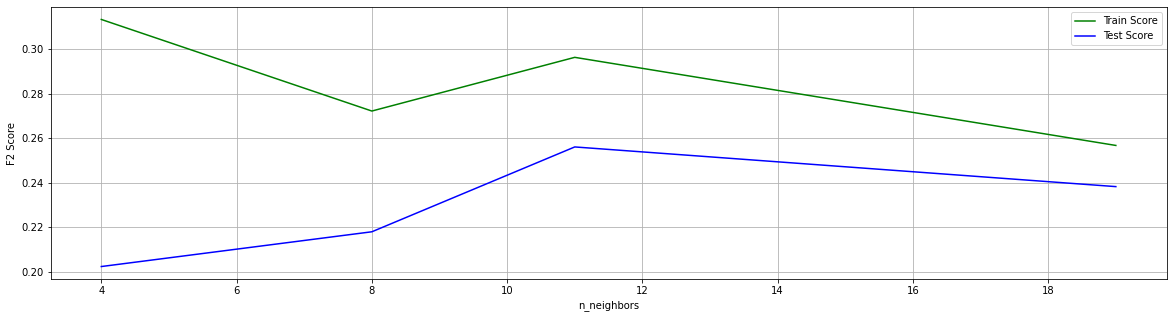

In [79]:
x_axis = np.array([4,8,11,19])
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, np.array(results_knn.mean_train_score), label = 'Train Score', c = 'g')
plt.plot(x_axis, np.array(results_knn.mean_test_score), label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('F2 Score')
plt.grid()
plt.legend()

In [80]:
print('Train score: {:.4f}'.format(pca_grid_search_knn.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_grid_search_knn.score(X_test_pca, y_test)))

Train score: 0.2976
Test score: 0.2351


In [81]:
pred_knn_pca = pca_grid_search_knn.predict(X_test_pca)

#### Model Evaluation

In [82]:
from sklearn.metrics import confusion_matrix

confusion_knn = confusion_matrix(y_test, pred_knn_pca)
print("Confusion matrix:\n{}".format(confusion_knn))

Confusion matrix:
[[8967  172]
 [ 921  237]]


In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_knn_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      9139
         yes       0.58      0.20      0.30      1158

    accuracy                           0.89     10297
   macro avg       0.74      0.59      0.62     10297
weighted avg       0.87      0.89      0.87     10297



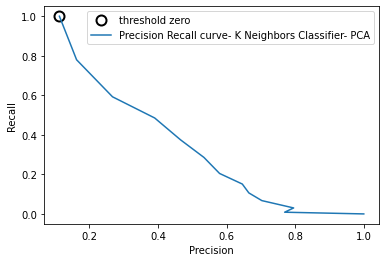

In [84]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, pca_grid_search_knn.predict_proba(X_test_pca)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_knn))

plt.plot(precision_knn[close_zero], recall_knn[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_knn, recall_knn, label="Precision Recall curve- K Neighbors Classifier- PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

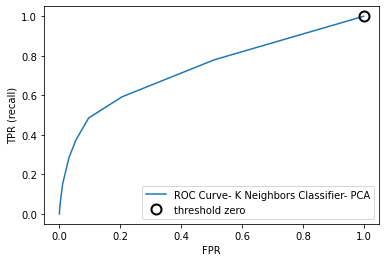

In [85]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, pca_grid_search_knn.predict_proba(X_test_pca)[:, 1])

plt.plot(fpr_knn, tpr_knn, label="ROC Curve- K Neighbors Classifier- PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_knn))
plt.plot(fpr_knn[close_zero], tpr_knn[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Logistic Regression -PCA

#### Hyperparameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
             
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [87]:
from sklearn.linear_model import LogisticRegression

pca_grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=500, penalty='l2'), param_grid, cv=5, return_train_score=True, scoring= f2score, n_jobs= -1, verbose = 4)


In [88]:
pca_grid_search_logreg.fit(X_train_pca, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  29 out of  35 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [89]:
print("Best parameters: {}".format(pca_grid_search_logreg.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_grid_search_logreg.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.23


In [90]:
# convert to DataFrame
results_logreg = pd.DataFrame(pca_grid_search_logreg.cv_results_)
# show the first 5 rows
display(results_logreg.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.055768,0.003312,0.003539,0.004334,0.001,{'C': 0.001},0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.105290,0.029966,0.003773,0.003267,0.01,{'C': 0.01},0.210722,0.206710,0.188519,0.214527,...,0.206016,0.009100,6,0.205688,0.200626,0.212784,0.204332,0.203589,0.205404,0.004045
2,0.118037,0.023742,0.002213,0.002713,0.1,{'C': 0.1},0.222855,0.239692,0.210296,0.220168,...,0.222388,0.009620,5,0.224563,0.219674,0.226987,0.226166,0.219184,0.223315,0.003271
3,0.092105,0.013779,0.006171,0.004289,1,{'C': 1},0.224230,0.241287,0.214909,0.223154,...,0.225131,0.008713,3,0.226453,0.222698,0.229385,0.227978,0.221064,0.225515,0.003152
4,0.105656,0.021573,0.010586,0.009497,10,{'C': 10},0.224230,0.241287,0.214909,0.223154,...,0.225131,0.008713,3,0.226453,0.222642,0.229765,0.228358,0.221064,0.225656,0.003316


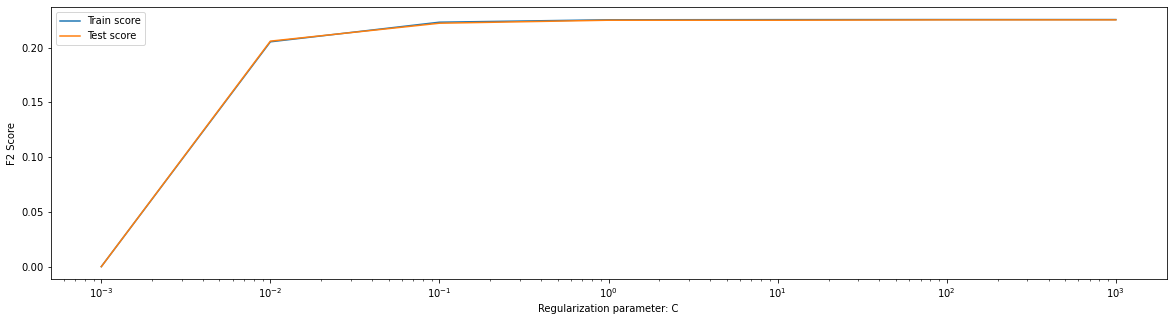

In [91]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_logreg.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_logreg.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F2 Score')
plt.xscale('log')

In [92]:
print('Train score: {:.4f}'.format(pca_grid_search_logreg.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_grid_search_logreg.score(X_test_pca, y_test)))

Train score: 0.2248
Test score: 0.2113


In [93]:
pred_logreg_pca = pca_grid_search_logreg.predict(X_test_pca)

#### Model Evaluation

In [94]:
from sklearn.metrics import confusion_matrix

confusion_logreg = confusion_matrix(y_test, pred_logreg_pca)
print("Confusion matrix:\n{}".format(confusion_logreg))

Confusion matrix:
[[9035  104]
 [ 949  209]]


In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_logreg_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.67      0.18      0.28      1158

    accuracy                           0.90     10297
   macro avg       0.79      0.58      0.61     10297
weighted avg       0.88      0.90      0.87     10297



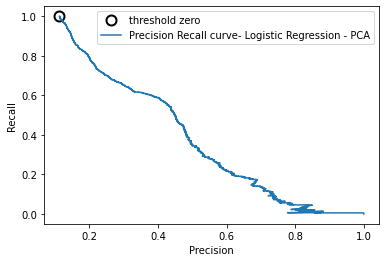

In [96]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, pca_grid_search_logreg.predict_proba(X_test_pca)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_logreg))

plt.plot(precision_logreg[close_zero], recall_logreg[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_logreg, recall_logreg, label="Precision Recall curve- Logistic Regression - PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

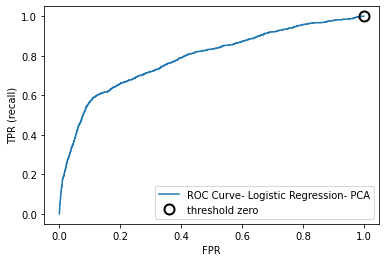

In [97]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, pca_grid_search_logreg.predict_proba(X_test_pca)[:, 1])

plt.plot(fpr_logreg, tpr_logreg, label="ROC Curve- Logistic Regression- PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_logreg))
plt.plot(fpr_logreg[close_zero], tpr_logreg[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Linear SVC - PCA

#### Hyperparameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10]}


In [99]:
from sklearn.svm import LinearSVC

pca_grid_search_linsvc = GridSearchCV(LinearSVC(), param_grid, cv=5, return_train_score=True, scoring= f2score, n_jobs= -1, verbose = 4)


In [100]:
pca_grid_search_linsvc.fit(X_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:    3.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.1s finished


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [101]:
print("Best parameters: {}".format(pca_grid_search_linsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_grid_search_linsvc.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.23


In [102]:
# convert to DataFrame
results_linsvc = pd.DataFrame(pca_grid_search_linsvc.cv_results_)
# show the first 5 rows
display(results_linsvc.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.165668,0.015441,0.006449,0.003225,0.001,{'C': 0.001},0.217172,0.224208,0.196544,0.222372,...,0.215244,0.009849,5,0.214400,0.212254,0.220669,0.213466,0.214714,0.215101,0.002913
1,0.173794,0.013857,0.002449,0.002933,0.01,{'C': 0.01},0.233801,0.226510,0.198921,0.229097,...,0.224839,0.013376,4,0.223360,0.222026,0.233239,0.226511,0.223405,0.225708,0.004043
2,0.437361,0.049212,0.009820,0.003115,0.1,{'C': 0.1},0.235314,0.231156,0.198720,0.229097,...,0.226349,0.014127,3,0.223824,0.223918,0.235230,0.228414,0.223255,0.226928,0.004546
3,3.250905,0.435119,0.002637,0.002567,1,{'C': 1},0.236904,0.231156,0.198720,0.229097,...,0.226985,0.014593,1,0.224206,0.223918,0.235211,0.228414,0.223237,0.226997,0.004492
4,9.858864,0.772688,0.004055,0.004262,10,{'C': 10},0.236904,0.231156,0.198720,0.229097,...,0.226985,0.014593,1,0.223862,0.223862,0.234434,0.228414,0.223637,0.226842,0.004199


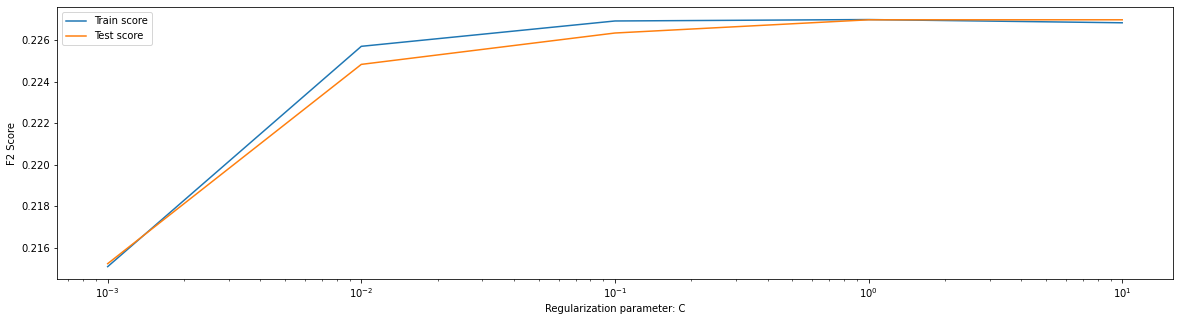

In [103]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_linsvc.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_linsvc.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F2 Score')
plt.xscale('log')

In [104]:
print('Train score: {:.4f}'.format(pca_grid_search_linsvc.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_grid_search_linsvc.score(X_test_pca, y_test)))

Train score: 0.2267
Test score: 0.2129


In [105]:
pred_linsvc_pca = pca_grid_search_linsvc.predict(X_test_pca)

#### Model Evaluation

In [106]:
from sklearn.metrics import confusion_matrix

confusion_linsvc = confusion_matrix(y_test, pred_linsvc_pca)
print("Confusion matrix:\n{}".format(confusion_linsvc))

Confusion matrix:
[[9026  113]
 [ 947  211]]


In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_linsvc_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94      9139
         yes       0.65      0.18      0.28      1158

    accuracy                           0.90     10297
   macro avg       0.78      0.58      0.61     10297
weighted avg       0.88      0.90      0.87     10297



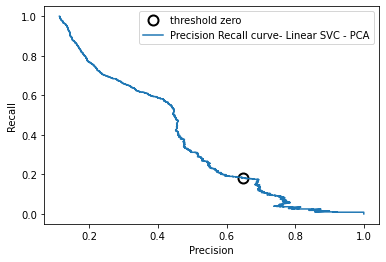

In [108]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_linsvc, recall_linsvc, thresholds_linsvc = precision_recall_curve(y_test, pca_grid_search_linsvc.decision_function(X_test_pca))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_linsvc))

plt.plot(precision_linsvc[close_zero], recall_linsvc[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_linsvc, recall_linsvc, label="Precision Recall curve- Linear SVC - PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

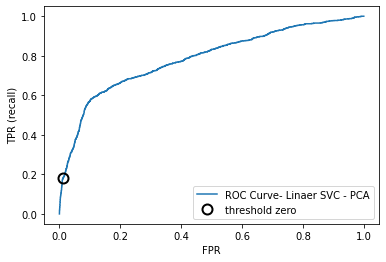

In [109]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_linsvc, tpr_linsvc, thresholds_linsvc = roc_curve(y_test, pca_grid_search_linsvc.decision_function(X_test_pca))

plt.plot(fpr_linsvc, tpr_linsvc, label="ROC Curve- Linaer SVC - PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_linsvc))
plt.plot(fpr_linsvc[close_zero], tpr_linsvc[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## SVC(kernel = 'linear') -PCA

#### Hyperparameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]} 

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.1, 1, 10]}


In [111]:
from sklearn.svm import SVC

pca_grid_search_ksvclin = GridSearchCV(SVC(kernel = 'linear', cache_size =14000), param_grid, cv=2, return_train_score=True, scoring= f2score, n_jobs= -1, verbose = 4)

In [112]:
pca_grid_search_ksvclin.fit(X_train_pca, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  3.4min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 17.9min finished


GridSearchCV(cv=2, estimator=SVC(cache_size=14000, kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10]}, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=4)

In [113]:
print("Best parameters: {}".format(pca_grid_search_ksvclin.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_grid_search_ksvclin.best_score_))

Best parameters: {'C': 0.1}
Best cross-validation score: 0.23


In [114]:
# convert to DataFrame
results_ksvclin = pd.DataFrame(pca_grid_search_ksvclin.cv_results_)
# show the first 5 rows
display(results_ksvclin.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,34.331839,0.850583,2.082626,0.006962,0.1,{'C': 0.1},0.233008,0.223411,0.22821,0.004799,1,0.222772,0.233645,0.228209,0.005436
1,209.285101,9.410936,1.658946,0.020974,1,{'C': 1},0.233008,0.223411,0.22821,0.004799,1,0.222772,0.233645,0.228209,0.005436
2,1026.966262,42.920925,0.950350,0.190839,10,{'C': 10},0.233008,0.223411,0.22821,0.004799,1,0.222772,0.233645,0.228209,0.005436


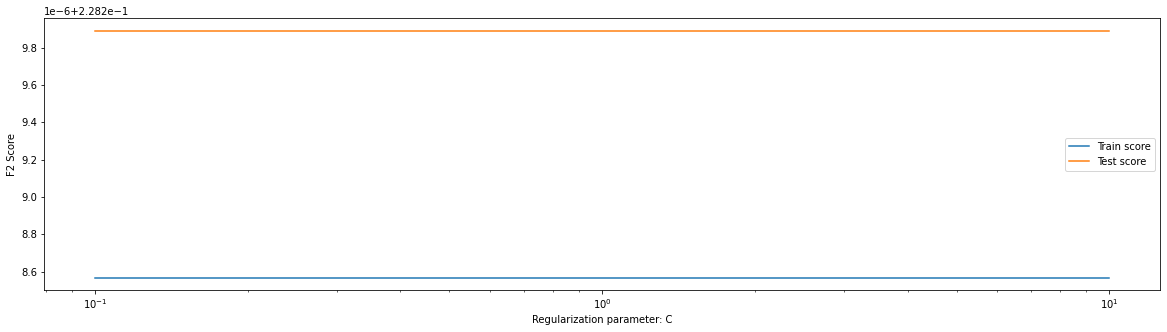

In [115]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_ksvclin.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_ksvclin.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F2 Score')
plt.xscale('log')

In [116]:
print('Train score: {:.4f}'.format(pca_grid_search_ksvclin.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_grid_search_ksvclin.score(X_test_pca, y_test)))

Train score: 0.2282
Test score: 0.2142


In [117]:
pred_ksvclin_pca = pca_grid_search_ksvclin.predict(X_test_pca)

#### Model Evaluation

In [118]:
from sklearn.metrics import confusion_matrix

confusion_ksvclin = confusion_matrix(y_test, pred_ksvclin_pca)
print("Confusion matrix:\n{}".format(confusion_ksvclin))

Confusion matrix:
[[9011  128]
 [ 945  213]]


In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvclin_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94      9139
         yes       0.62      0.18      0.28      1158

    accuracy                           0.90     10297
   macro avg       0.76      0.58      0.61     10297
weighted avg       0.87      0.90      0.87     10297



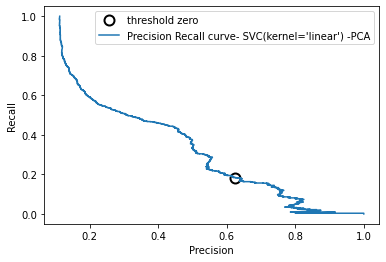

In [120]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ksvclin, recall_ksvclin, thresholds_ksvclin = precision_recall_curve(y_test, pca_grid_search_ksvclin.decision_function(X_test_pca))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvclin))

plt.plot(precision_ksvclin[close_zero], recall_ksvclin[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ksvclin, recall_ksvclin, label="Precision Recall curve- SVC(kernel='linear') -PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

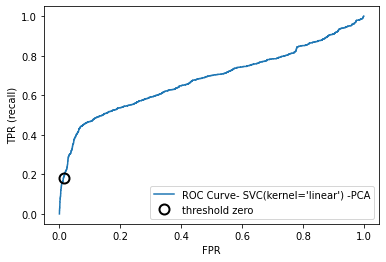

In [121]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ksvclin, tpr_ksvclin, thresholds_ksvclin = roc_curve(y_test, pca_grid_search_ksvclin.decision_function(X_test_pca))

plt.plot(fpr_ksvclin, tpr_ksvclin, label="ROC Curve- SVC(kernel='linear') -PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvclin))
plt.plot(fpr_ksvclin[close_zero], tpr_ksvclin[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## SVC(kernel = 'poly') - PCA

#### Hyperparameter Tuning

In [122]:
from sklearn.model_selection import RandomizedSearchCV

#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}   -Best C= 1

#Rerun with reduced param set
#param_grid = {'C': [0.7, 1, 1.5, 2]}
param_grid = {'C': [0.7, 1, 1.5, 2]}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.7, 1, 1.5, 2]}


In [123]:
from sklearn.svm import SVC

pca_random_search_ksvcpoly = RandomizedSearchCV(SVC(kernel= 'poly', degree=3, cache_size= 14000), param_grid, cv= 2, scoring =f2score, return_train_score=True, n_jobs= -1, verbose = 4)

In [124]:
pca_random_search_ksvcpoly.fit(X_train_pca, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


C:\Users\neema\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   54.3s remaining:  2.7min
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:  1.0min remaining:   37.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  1.1min finished


RandomizedSearchCV(cv=2, estimator=SVC(cache_size=14000, kernel='poly'),
                   n_jobs=-1, param_distributions={'C': [0.7, 1, 1.5, 2]},
                   return_train_score=True,
                   scoring=make_scorer(fbeta_score, beta=2), verbose=4)

In [125]:
print("Best parameters: {}".format(pca_random_search_ksvcpoly.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_random_search_ksvcpoly.best_score_))

Best parameters: {'C': 2}
Best cross-validation score: 0.24


In [127]:
# convert to DataFrame
results_ksvcpoly = pd.DataFrame(pca_random_search_ksvcpoly.cv_results_)
# show the first 5 rows
display(results_ksvcpoly.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,44.081018,2.719473,3.895028,0.027285,0.7,{'C': 0.7},0.221072,0.214468,0.217770,0.003302,4,0.238995,0.259810,0.249403,0.010407
1,51.884221,2.255051,3.096423,0.472688,1,{'C': 1},0.225902,0.217391,0.221646,0.004255,3,0.256997,0.272022,0.264510,0.007513
2,57.434668,2.957408,2.164820,0.524257,1.5,{'C': 1.5},0.236891,0.220303,0.228597,0.008294,2,0.285199,0.283120,0.284159,0.001040
3,61.405460,1.096367,1.647540,0.024092,2,{'C': 2},0.252705,0.220067,0.236386,0.016319,1,0.320037,0.295294,0.307666,0.012372


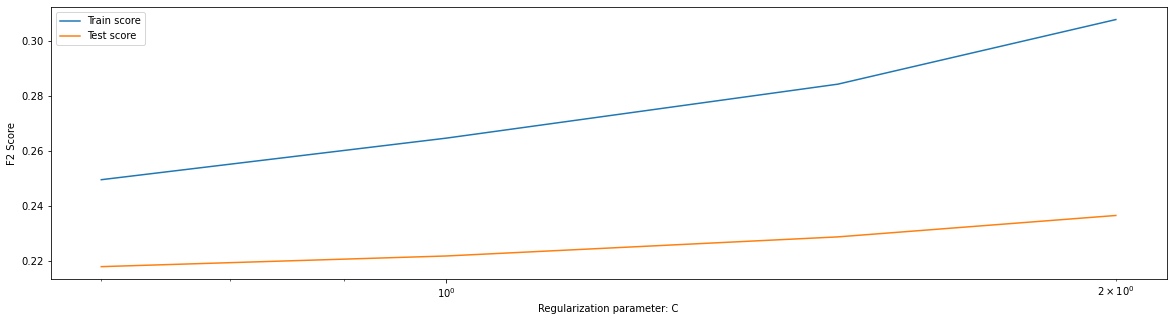

In [128]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplots(figsize = (20,5))
plt.plot(param_grid['C'], np.array(results_ksvcpoly.mean_train_score), label = 'Train score')
plt.plot(param_grid['C'], np.array(results_ksvcpoly.mean_test_score), label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('F2 Score')
plt.xscale('log')

In [129]:
print('Train score: {:.4f}'.format(pca_random_search_ksvcpoly.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_random_search_ksvcpoly.score(X_test_pca, y_test)))

Train score: 0.2521
Test score: 0.2043


In [131]:
pred_ksvcpoly_pca = pca_random_search_ksvcpoly.predict(X_test_pca)

#### Model Evaluation

In [132]:
from sklearn.metrics import confusion_matrix

confusion_ksvcpoly = confusion_matrix(y_test, pred_ksvcpoly_pca)
print("Confusion matrix:\n{}".format(confusion_ksvcpoly))

Confusion matrix:
[[9029  110]
 [ 956  202]]


In [133]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvcpoly_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.65      0.17      0.27      1158

    accuracy                           0.90     10297
   macro avg       0.78      0.58      0.61     10297
weighted avg       0.88      0.90      0.87     10297



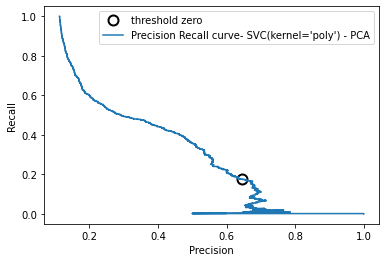

In [134]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ksvcpoly, recall_ksvcpoly, thresholds_ksvcpoly = precision_recall_curve(y_test, pca_random_search_ksvcpoly.decision_function(X_test_pca))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcpoly))

plt.plot(precision_ksvcpoly[close_zero], recall_ksvcpoly[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ksvcpoly, recall_ksvcpoly, label="Precision Recall curve- SVC(kernel='poly') - PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

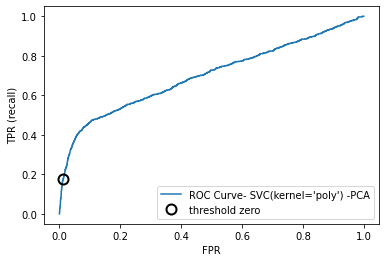

In [135]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ksvcpoly, tpr_ksvcpoly, thresholds_ksvcpoly = roc_curve(y_test, pca_random_search_ksvcpoly.decision_function(X_test_pca))

plt.plot(fpr_ksvcpoly, tpr_ksvcpoly, label="ROC Curve- SVC(kernel='poly') -PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcpoly))
plt.plot(fpr_ksvcpoly[close_zero], tpr_ksvcpoly[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## SVC(kernel = 'rbf') -PCA

#### Hyperparameter Tuning

In [151]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}


In [152]:
from sklearn.svm import SVC

pca_grid_search_ksvcrbf = GridSearchCV(SVC(kernel = 'rbf', cache_size =14000), param_grid, cv=2, scoring= f2score, return_train_score=True, n_jobs= -1, verbose = 4)

In [153]:
pca_grid_search_ksvcrbf.fit(X_train_pca, y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:  4.8min remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.9min finished


GridSearchCV(cv=2, estimator=SVC(cache_size=14000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [154]:
print("Best parameters: {}".format(pca_grid_search_ksvcrbf.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_grid_search_ksvcrbf.best_score_))

Best parameters: {'C': 10, 'gamma': 1}
Best cross-validation score: 0.25


In [155]:
# convert to DataFrame
results_ksvcrbf = pd.DataFrame(pca_grid_search_ksvcrbf.cv_results_)
# show the first 5 rows
display(results_ksvcrbf.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,3.542630,0.020494,2.519186,0.007086,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0
1,3.780116,0.015016,2.623572,0.095053,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0
2,3.983670,0.150368,2.827129,0.026588,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0
3,3.855466,0.212139,2.676533,0.149262,0.001,1,"{'C': 0.001, 'gamma': 1}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0
4,3.465844,0.009795,3.047400,0.021616,0.001,10,"{'C': 0.001, 'gamma': 10}",0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0


In [156]:
print('Train score: {:.4f}'.format(pca_grid_search_ksvcrbf.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_grid_search_ksvcrbf.score(X_test_pca, y_test)))

Train score: 0.6497
Test score: 0.2470


In [158]:
pred_ksvcrbf_pca = pca_grid_search_ksvcrbf.predict(X_test_pca)

#### Model Evaluation

In [159]:
from sklearn.metrics import confusion_matrix

confusion_ksvcrbf = confusion_matrix(y_test, pred_ksvcrbf_pca)
print("Confusion matrix:\n{}".format(confusion_ksvcrbf))

Confusion matrix:
[[8826  313]
 [ 901  257]]


In [160]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ksvcrbf_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      9139
         yes       0.45      0.22      0.30      1158

    accuracy                           0.88     10297
   macro avg       0.68      0.59      0.62     10297
weighted avg       0.86      0.88      0.86     10297



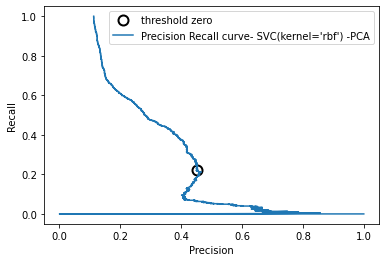

In [161]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ksvcrbf, recall_ksvcrbf, thresholds_ksvcrbf = precision_recall_curve(y_test, pca_grid_search_ksvcrbf.decision_function(X_test_pca))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcrbf))

plt.plot(precision_ksvcrbf[close_zero], recall_ksvcrbf[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ksvcrbf, recall_ksvcrbf, label="Precision Recall curve- SVC(kernel='rbf') -PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

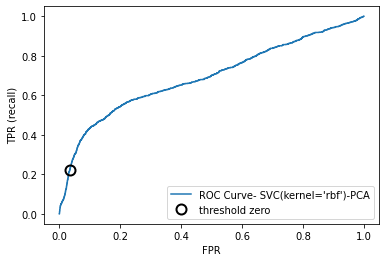

In [162]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ksvcrbf, tpr_ksvcrbf, thresholds_ksvcrbf = roc_curve(y_test, pca_grid_search_ksvcrbf.decision_function(X_test_pca))

plt.plot(fpr_ksvcrbf, tpr_ksvcrbf, label="ROC Curve- SVC(kernel='rbf')-PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ksvcrbf))
plt.plot(fpr_ksvcrbf[close_zero], tpr_ksvcrbf[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Decision Tree Classifier -PCA

#### Hyperparameter Tuning

In [163]:
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90], 
              'criterion': ['entropy','gini']}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90], 'criterion': ['entropy', 'gini']}


In [164]:
from sklearn.tree import DecisionTreeClassifier

pca_grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv=5,scoring= f2score, return_train_score=True, n_jobs= -1, verbose = 4)

In [165]:
pca_grid_search_dtree.fit(X_train_pca, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   39.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [166]:
print("Best parameters: {}".format(pca_grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(pca_grid_search_dtree.best_score_))

Best parameters: {'criterion': 'gini', 'max_depth': 30}
Best cross-validation score: 0.32


In [167]:
# convert to DataFrame
results_dtree = pd.DataFrame(pca_grid_search_dtree.cv_results_)
# show the first 5 rows
display(results_dtree.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.644635,0.060704,0.004080,0.003579,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.223229,0.226662,0.207984,...,0.211663,0.013521,30,0.214496,0.228244,0.238254,0.219715,0.209039,0.221950,0.010322
1,0.798849,0.056861,0.003011,0.003589,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.244511,0.208965,0.195286,...,0.218218,0.017006,28,0.242986,0.217996,0.231493,0.231338,0.242239,0.233210,0.009110
2,0.937917,0.052395,0.005818,0.004848,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.229312,0.230924,0.204698,...,0.219195,0.012974,27,0.266523,0.248203,0.252969,0.236515,0.252322,0.251306,0.009631
3,1.089536,0.085413,0.004639,0.003968,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.225033,0.220000,0.250407,...,0.226481,0.013551,26,0.306711,0.263993,0.331215,0.285679,0.278240,0.293167,0.023499
4,1.249351,0.081781,0.006074,0.006719,entropy,8,"{'criterion': 'entropy', 'max_depth': 8}",0.263835,0.242067,0.212131,...,0.235138,0.022029,24,0.375292,0.323679,0.301760,0.294044,0.322726,0.323500,0.028367


In [168]:
print('Train score: {:.4f}'.format(pca_grid_search_dtree.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(pca_grid_search_dtree.score(X_test_pca, y_test)))

Train score: 0.8140
Test score: 0.2839


In [169]:
pca_dtree = DecisionTreeClassifier(random_state = 0, criterion='gini', max_depth=40)
pca_dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=40, random_state=0)

[Text(234.38435463512738, 214.78829268292682, 'X[20] <= 0.59\ngini = 0.2\nsamples = 30891\nvalue = [27409, 3482]'),
 Text(151.472631595726, 209.48487804878047, 'X[0] <= 0.505\ngini = 0.171\nsamples = 29901\nvalue = [27071, 2830]'),
 Text(76.0708654947965, 204.18146341463415, 'X[15] <= -0.416\ngini = 0.108\nsamples = 22430\nvalue = [21141, 1289]'),
 Text(16.426404317289766, 198.8780487804878, 'X[11] <= -0.016\ngini = 0.292\nsamples = 1489\nvalue = [1225, 264]'),
 Text(6.05350612767892, 193.57463414634145, 'X[20] <= -0.077\ngini = 0.2\nsamples = 841\nvalue = [746, 95]'),
 Text(3.175481108853742, 188.2712195121951, 'X[6] <= -0.755\ngini = 0.13\nsamples = 517\nvalue = [481, 36]'),
 Text(2.7736406917175294, 182.96780487804878, 'X[2] <= -0.294\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(2.5727204831494235, 177.66439024390243, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(2.9745609002856357, 177.66439024390243, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(3.5773215259899547, 

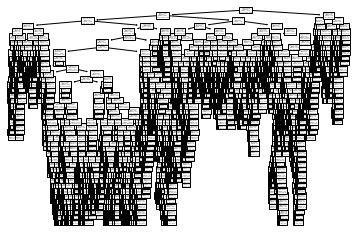

In [170]:
from sklearn import tree
tree.plot_tree(pca_dtree)

In [171]:
pred_dtree_pca = pca_grid_search_dtree.predict(X_test_pca)

#### Model Evaluation

In [172]:
from sklearn.metrics import confusion_matrix

confusion_dtree = confusion_matrix(y_test, pred_dtree_pca)
print("Confusion matrix:\n{}".format(confusion_dtree))

Confusion matrix:
[[8589  550]
 [ 846  312]]


In [173]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_dtree_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.94      0.92      9139
         yes       0.36      0.27      0.31      1158

    accuracy                           0.86     10297
   macro avg       0.64      0.60      0.62     10297
weighted avg       0.85      0.86      0.86     10297



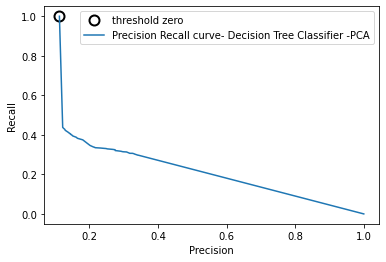

In [174]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_dtree, recall_dtree, thresholds_dtree = precision_recall_curve(y_test, pca_dtree.predict_proba(X_test_pca)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_dtree))

plt.plot(precision_dtree[close_zero], recall_dtree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_dtree, recall_dtree, label="Precision Recall curve- Decision Tree Classifier -PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

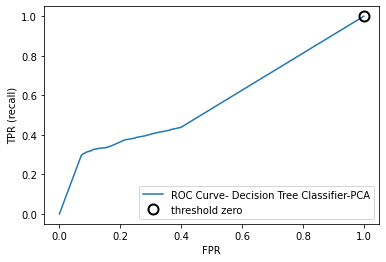

In [175]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, pca_dtree.predict_proba(X_test_pca)[:, 1])

plt.plot(fpr_dtree, tpr_dtree, label="ROC Curve- Decision Tree Classifier-PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_dtree))
plt.plot(fpr_dtree[close_zero], tpr_dtree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Voting Classifier - Hard -PCA

In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [177]:
pca_log_clf = LogisticRegression(C = 100, max_iter=500, penalty='l2', n_jobs =-1, verbose = 4 )
pca_log_clf.fit(X_train_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=100, max_iter=500, n_jobs=-1, verbose=4)

In [178]:
pca_knn_clf = KNeighborsClassifier(n_neighbors = 11, n_jobs =-1)
pca_knn_clf.fit(X_train_pca, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [179]:
pca_svm_clf = SVC(C = 10, gamma = 0.1, probability = True, kernel = 'rbf', cache_size =14000, verbose = 4)
pca_svm_clf.fit(X_train_pca, y_train)

[LibSVM]

SVC(C=10, cache_size=14000, gamma=0.1, probability=True, verbose=4)

In [180]:
pca_voting_hard = VotingClassifier(estimators=[('lr', pca_log_clf), ('knn', pca_knn_clf), ('svc', pca_svm_clf)], voting='hard',n_jobs =-1, verbose = 4)
pca_voting_hard.fit(X_train_pca, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=100, max_iter=500, n_jobs=-1,
                                                 verbose=4)),
                             ('knn',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=11)),
                             ('svc',
                              SVC(C=10, cache_size=14000, gamma=0.1,
                                  probability=True, verbose=4))],
                 n_jobs=-1, verbose=4)

In [181]:
for clf in (pca_log_clf, pca_knn_clf, pca_svm_clf, pca_voting_hard):
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test_pca)
    print(clf.__class__.__name__, fbeta_score(y_test, y_pred, beta=2))

LogisticRegression 0.21132457027300303
KNeighborsClassifier 0.23507240626859754
SVC 0.20247013565499086
VotingClassifier 0.20267531414673692


In [182]:
pred_voting_hard_train_pca = pca_voting_hard.predict(X_train_pca)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_voting_hard_train_pca, beta=2)))

pred_voting_hard_test_pca = pca_voting_hard.predict(X_test_pca)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_voting_hard_test_pca, beta=2)))

Train score: 0.2326
Test score: 0.2027


#### Model Evaluation

In [183]:
from sklearn.metrics import confusion_matrix

confusion_voting_hard = confusion_matrix(y_test, pred_voting_hard_test_pca)
print("Confusion matrix:\n{}".format(confusion_voting_hard))

Confusion matrix:
[[9037  102]
 [ 958  200]]


In [184]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_voting_hard_test_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.66      0.17      0.27      1158

    accuracy                           0.90     10297
   macro avg       0.78      0.58      0.61     10297
weighted avg       0.88      0.90      0.87     10297



## Voting Classifier - Soft -PCA

In [185]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [186]:
pca_log_clf = LogisticRegression(C = 100, max_iter=500, penalty='l2', n_jobs =-1, verbose = 4 )
pca_log_clf.fit(X_train_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(C=100, max_iter=500, n_jobs=-1, verbose=4)

In [187]:
pca_knn_clf = KNeighborsClassifier(n_neighbors = 11, n_jobs =-1)
pca_knn_clf.fit(X_train_pca, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

In [188]:
pca_svm_clf = SVC(C = 10, gamma = 0.1, probability = True, kernel = 'rbf', cache_size =14000, verbose = 4)
pca_svm_clf.fit(X_train_pca, y_train)

[LibSVM]

SVC(C=10, cache_size=14000, gamma=0.1, probability=True, verbose=4)

In [190]:
pca_voting_soft = VotingClassifier(estimators=[('lr', pca_log_clf), ('knn', pca_knn_clf), ('svc', pca_svm_clf)], voting='soft',n_jobs =-1, verbose = 4)
pca_voting_soft.fit(X_train_pca, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=100, max_iter=500, n_jobs=-1,
                                                 verbose=4)),
                             ('knn',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=11)),
                             ('svc',
                              SVC(C=10, cache_size=14000, gamma=0.1,
                                  probability=True, verbose=4))],
                 n_jobs=-1, verbose=4, voting='soft')

In [191]:
for clf in (pca_log_clf, pca_knn_clf, pca_svm_clf, pca_voting_soft):
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test_pca)
    print(clf.__class__.__name__, fbeta_score(y_test, y_pred, beta=2))

LogisticRegression 0.21132457027300303
KNeighborsClassifier 0.23507240626859754
SVC 0.20247013565499086
VotingClassifier 0.20081135902636915


In [192]:
pred_voting_soft_train_pca = pca_voting_soft.predict(X_train_pca)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_voting_soft_train_pca, beta=2)))

pred_voting_soft_test_pca = pca_voting_soft.predict(X_test_pca)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_voting_soft_test_pca, beta=2)))

Train score: 0.2298
Test score: 0.2008


#### Model Evaluation

In [193]:
from sklearn.metrics import confusion_matrix

confusion_voting_soft = confusion_matrix(y_test, pred_voting_soft_test_pca)
print("Confusion matrix:\n{}".format(confusion_voting_soft))

Confusion matrix:
[[9039  100]
 [ 960  198]]


In [194]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_voting_soft_test_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.66      0.17      0.27      1158

    accuracy                           0.90     10297
   macro avg       0.78      0.58      0.61     10297
weighted avg       0.88      0.90      0.87     10297



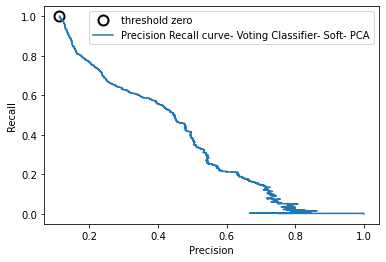

In [195]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_voting_soft, recall_voting_soft, thresholds_voting_soft = precision_recall_curve(y_test, pca_voting_soft.predict_proba(X_test_pca)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_voting_soft))

plt.plot(precision_voting_soft[close_zero], recall_voting_soft[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_voting_soft, recall_voting_soft, label="Precision Recall curve- Voting Classifier- Soft- PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

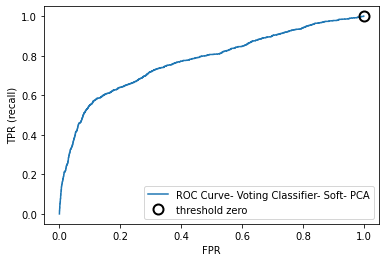

In [196]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_voting_soft, tpr_voting_soft, thresholds_voting_soft = roc_curve(y_test, pca_voting_soft.predict_proba(X_test_pca)[:, 1])

plt.plot(fpr_voting_soft, tpr_voting_soft, label="ROC Curve- Voting Classifier- Soft- PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_voting_soft))
plt.plot(fpr_voting_soft[close_zero], tpr_voting_soft[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Bagging -Logistic Regression -PCA

In [197]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [198]:
pca_log_clf = LogisticRegression(C = 100, max_iter=500, penalty='l2', n_jobs =-1, verbose = 4 )
pca_bag_log = BaggingClassifier(pca_log_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0, verbose =4)
pca_bag_log.fit(X_train_pca, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   18.7s remaining:   56.2s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   18.9s remaining:   11.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   19.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   19.3s finished


BaggingClassifier(base_estimator=LogisticRegression(C=100, max_iter=500,
                                                    n_jobs=-1, verbose=4),
                  max_samples=100, n_estimators=500, n_jobs=-1, random_state=0,
                  verbose=4)

In [200]:
pred_bag_log_train_pca = pca_bag_log.predict(X_train_pca)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_bag_log_train_pca, beta=2)))

pred_bag_log_test_pca = pca_bag_log.predict(X_test_pca)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_bag_log_test_pca, beta=2)))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.3s remaining:    1.2s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Train score: 0.2146


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.7s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.3s finished


Test score: 0.2020


#### Model Evaluation

In [204]:
from sklearn.metrics import confusion_matrix

confusion_bag_log = confusion_matrix(y_test, pred_bag_log_test_pca)
print("Confusion matrix:\n{}".format(confusion_bag_log))

Confusion matrix:
[[9044   95]
 [ 959  199]]


In [205]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_bag_log_test_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.68      0.17      0.27      1158

    accuracy                           0.90     10297
   macro avg       0.79      0.58      0.61     10297
weighted avg       0.88      0.90      0.87     10297



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished


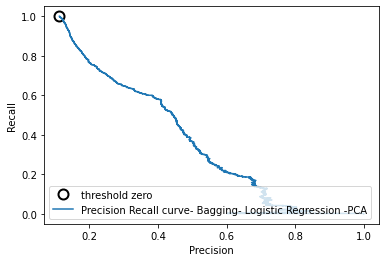

In [206]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_bag_log, recall_bag_log, thresholds_bag_log = precision_recall_curve(y_test, pca_bag_log.predict_proba(X_test_pca)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_bag_log))

plt.plot(precision_bag_log[close_zero], recall_bag_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_bag_log, recall_bag_log, label="Precision Recall curve- Bagging- Logistic Regression -PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished


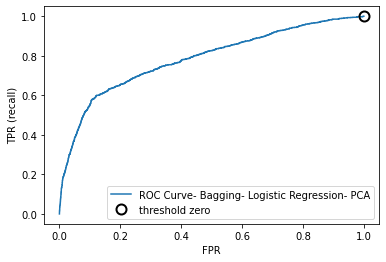

In [207]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_bag_log, tpr_bag_log, thresholds_bag_log = roc_curve(y_test, pca_bag_log.predict_proba(X_test_pca)[:, 1])

plt.plot(fpr_bag_log, tpr_bag_log, label="ROC Curve- Bagging- Logistic Regression- PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_bag_log))
plt.plot(fpr_bag_log[close_zero], tpr_bag_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Bagging -Random Forest-PCA

In [208]:
from sklearn.ensemble import RandomForestClassifier

pca_bag_rnd = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0, verbose = 4)
pca_bag_rnd.fit(X_train_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.6s


building tree 96 of 500
building tree 97 of 500
building tree 98 of 500
building tree 99 of 500
building tree 100 of 500
building tree 101 of 500
building tree 102 of 500
building tree 103 of 500
building tree 104 of 500
building tree 105 of 500
building tree 106 of 500
building tree 107 of 500
building tree 108 of 500
building tree 109 of 500
building tree 110 of 500
building tree 111 of 500
building tree 112 of 500
building tree 113 of 500
building tree 114 of 500
building tree 115 of 500
building tree 116 of 500
building tree 117 of 500
building tree 118 of 500
building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
buil

[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    1.7s


building tree 233 of 500
building tree 234 of 500
building tree 235 of 500
building tree 236 of 500
building tree 237 of 500
building tree 238 of 500
building tree 239 of 500
building tree 240 of 500
building tree 241 of 500
building tree 242 of 500
building tree 243 of 500
building tree 244 of 500
building tree 245 of 500
building tree 246 of 500
building tree 247 of 500
building tree 248 of 500
building tree 249 of 500
building tree 250 of 500
building tree 251 of 500
building tree 252 of 500
building tree 253 of 500
building tree 254 of 500
building tree 255 of 500
building tree 256 of 500
building tree 257 of 500
building tree 258 of 500
building tree 259 of 500
building tree 260 of 500building tree 261 of 500

building tree 262 of 500
building tree 263 of 500
building tree 264 of 500
building tree 265 of 500
building tree 266 of 500
building tree 267 of 500
building tree 268 of 500
building tree 269 of 500
building tree 270 of 500
building tree 271 of 500
building tree 272 of 500


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    3.2s



building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500building tree 405 of 500

building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500
building tree 413 of 500
building tree 414 of 500
building tree 415 of 500
building tree 416 of 500
building tree 417 of 500
building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.2s finished


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=0, verbose=4)

In [209]:
pred_bag_rnd_train_pca = pca_bag_rnd.predict(X_train_pca)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_bag_rnd_train_pca, beta=2)))

pred_bag_rnd_test_pca = pca_bag_rnd.predict(X_test_pca)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_bag_rnd_test_pca, beta=2)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s


Train score: 0.2144
Test score: 0.1991


[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


#### Model Evaluation

In [212]:
from sklearn.metrics import confusion_matrix

confusion_bag_rnd= confusion_matrix(y_test, pred_bag_rnd_test_pca)
print("Confusion matrix:\n{}".format(confusion_bag_rnd))

Confusion matrix:
[[9045   94]
 [ 962  196]]


In [213]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_bag_rnd_test_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.68      0.17      0.27      1158

    accuracy                           0.90     10297
   macro avg       0.79      0.58      0.61     10297
weighted avg       0.88      0.90      0.87     10297



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


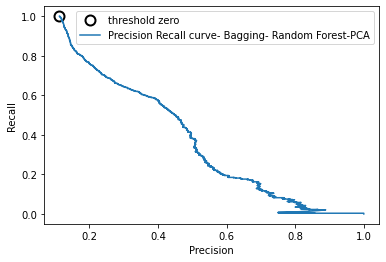

In [214]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_bag_rnd, recall_bag_rnd, thresholds_bag_rnd = precision_recall_curve(y_test, pca_bag_rnd.predict_proba(X_test_pca)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_bag_rnd))

plt.plot(precision_bag_rnd[close_zero], recall_bag_rnd[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_bag_rnd, recall_bag_rnd, label="Precision Recall curve- Bagging- Random Forest-PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


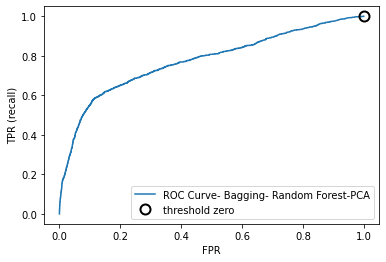

In [215]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_bag_rnd, tpr_bag_rnd, thresholds_bag_rnd = roc_curve(y_test, pca_bag_rnd.predict_proba(X_test_pca)[:, 1])

plt.plot(fpr_bag_rnd, tpr_bag_rnd, label="ROC Curve- Bagging- Random Forest-PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_bag_rnd))
plt.plot(fpr_bag_rnd[close_zero], tpr_bag_rnd[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Pasting - Logistic Regression-PCA

In [216]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [217]:
pca_log_clf = LogisticRegression(C = 100, max_iter=500, penalty='l2', n_jobs =-1, verbose = 4 )
pca_pst_log = BaggingClassifier(pca_log_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0, verbose =4)
pca_pst_log.fit(X_train_pca, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   17.0s remaining:   51.2s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   17.3s remaining:   10.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.6s finished


BaggingClassifier(base_estimator=LogisticRegression(C=100, max_iter=500,
                                                    n_jobs=-1, verbose=4),
                  bootstrap=False, max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=0, verbose=4)

In [218]:
pred_pst_log_train_pca = pca_pst_log.predict(X_train_pca)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_pst_log_train_pca, beta=2)))

pred_pst_log_test_pca = pca_pst_log.predict(X_test_pca)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_pst_log_test_pca, beta=2)))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.3s remaining:    1.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s finished


Train score: 0.2140


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Test score: 0.2020


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished


#### Model Evaluation

In [222]:
from sklearn.metrics import confusion_matrix

confusion_pst_log = confusion_matrix(y_test, pred_pst_log_test_pca)
print("Confusion matrix:\n{}".format(confusion_pst_log))

Confusion matrix:
[[9045   94]
 [ 959  199]]


In [223]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_pst_log_test_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.68      0.17      0.27      1158

    accuracy                           0.90     10297
   macro avg       0.79      0.58      0.61     10297
weighted avg       0.88      0.90      0.87     10297



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished


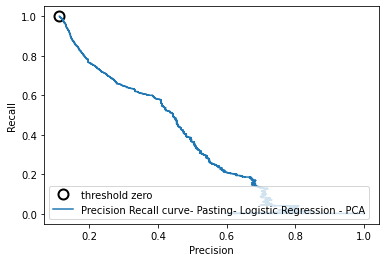

In [224]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_pst_log, recall_pst_log, thresholds_pst_log = precision_recall_curve(y_test, pca_pst_log.predict_proba(X_test_pca)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_pst_log))

plt.plot(precision_pst_log[close_zero], recall_pst_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_pst_log, recall_pst_log, label="Precision Recall curve- Pasting- Logistic Regression - PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished


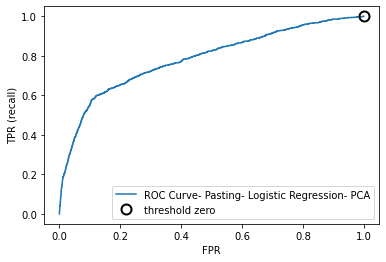

In [225]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_pst_log, tpr_pst_log, thresholds_pst_log = roc_curve(y_test, pca_pst_log.predict_proba(X_test_pca)[:, 1])

plt.plot(fpr_pst_log, tpr_pst_log, label="ROC Curve- Pasting- Logistic Regression- PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_pst_log))
plt.plot(fpr_pst_log[close_zero], tpr_pst_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Pasting -Random Forest- PCA

In [226]:
from sklearn.ensemble import RandomForestClassifier

pca_pst_rnd = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0, verbose = 4, bootstrap = False)
pca_pst_rnd.fit(X_train_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s


building tree 1 of 500building tree 2 of 500

building tree 3 of 500building tree 4 of 500

building tree 5 of 500
building tree 6 of 500building tree 7 of 500
building tree 8 of 500

building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500building tree 22 of 500

building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    1.1s


building tree 94 of 500building tree 95 of 500

building tree 96 of 500
building tree 97 of 500
building tree 98 of 500
building tree 99 of 500
building tree 100 of 500
building tree 101 of 500
building tree 102 of 500
building tree 103 of 500
building tree 104 of 500
building tree 105 of 500building tree 106 of 500

building tree 107 of 500
building tree 108 of 500
building tree 109 of 500
building tree 110 of 500
building tree 111 of 500
building tree 112 of 500
building tree 113 of 500
building tree 114 of 500
building tree 115 of 500
building tree 116 of 500
building tree 117 of 500
building tree 118 of 500
building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
buildi

[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    2.7s


building tree 214 of 500
building tree 215 of 500
building tree 216 of 500
building tree 217 of 500
building tree 218 of 500
building tree 219 of 500
building tree 220 of 500
building tree 221 of 500
building tree 222 of 500
building tree 223 of 500
building tree 224 of 500
building tree 225 of 500
building tree 226 of 500
building tree 227 of 500
building tree 228 of 500
building tree 229 of 500
building tree 230 of 500
building tree 231 of 500
building tree 232 of 500
building tree 233 of 500
building tree 234 of 500
building tree 235 of 500
building tree 236 of 500
building tree 237 of 500
building tree 238 of 500
building tree 239 of 500
building tree 240 of 500
building tree 241 of 500
building tree 242 of 500
building tree 243 of 500
building tree 244 of 500
building tree 245 of 500
building tree 246 of 500
building tree 247 of 500
building tree 248 of 500
building tree 249 of 500
building tree 250 of 500
building tree 251 of 500
building tree 252 of 500
building tree 253 of 500


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    4.9s


building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500
building tree 413 of 500
building tree 414 of 500
building tree 415 of 500
building tree 416 of 500
building tree 417 of 500building tree 418 of 500

building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.5s finished


RandomForestClassifier(bootstrap=False, max_leaf_nodes=16, n_estimators=500,
                       n_jobs=-1, random_state=0, verbose=4)

In [227]:
pred_pst_rnd_train_pca = pca_bag_rnd.predict(X_train_pca)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_pst_rnd_train_pca, beta=2)))

pred_pst_rnd_test_pca = pca_pst_rnd.predict(X_test_pca)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_pst_rnd_test_pca, beta=2)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s


Train score: 0.2144
Test score: 0.1980


[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


#### Model Evaluation

In [230]:
from sklearn.metrics import confusion_matrix

confusion_pst_rnd= confusion_matrix(y_test, pred_pst_rnd_test_pca)
print("Confusion matrix:\n{}".format(confusion_pst_rnd))

Confusion matrix:
[[9043   96]
 [ 963  195]]


In [231]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_pst_rnd_test_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.67      0.17      0.27      1158

    accuracy                           0.90     10297
   macro avg       0.79      0.58      0.61     10297
weighted avg       0.88      0.90      0.87     10297



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


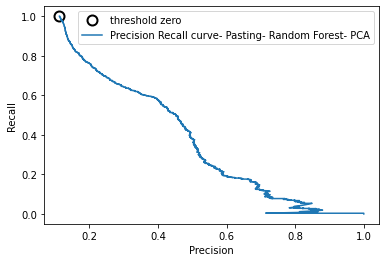

In [232]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_pst_rnd, recall_pst_rnd, thresholds_pst_rnd = precision_recall_curve(y_test, pca_pst_rnd.predict_proba(X_test_pca)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_pst_rnd))

plt.plot(precision_pst_rnd[close_zero], recall_pst_rnd[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_pst_rnd, recall_pst_rnd, label="Precision Recall curve- Pasting- Random Forest- PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 205 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 376 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


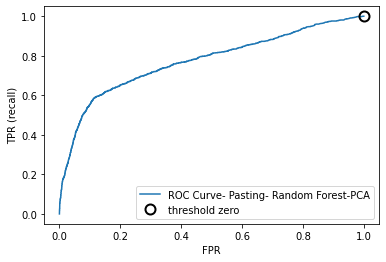

In [233]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_pst_rnd, tpr_pst_rnd, thresholds_pst_rnd = roc_curve(y_test, pca_pst_rnd.predict_proba(X_test_pca)[:, 1])

plt.plot(fpr_pst_rnd, tpr_pst_rnd, label="ROC Curve- Pasting- Random Forest-PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_pst_rnd))
plt.plot(fpr_pst_rnd[close_zero], tpr_pst_rnd[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## AdaBoost - Decision Tree -PCA

In [234]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

pca_dtree = DecisionTreeClassifier(random_state = 0, criterion='gini'  , max_depth=40)

pca_ada_dtree = AdaBoostClassifier(pca_dtree, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
pca_ada_dtree.fit(X_train_pca, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=40,
                                                         random_state=0),
                   learning_rate=0.5, n_estimators=200, random_state=0)

In [238]:
pred_ada_dtree_train_pca = pca_ada_dtree.predict(X_train_pca)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_ada_dtree_train_pca, beta=2)))

pred_ada_dtree_test_pca = pca_ada_dtree.predict(X_test_pca)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_ada_dtree_test_pca, beta=2)))

Train score: 0.9674
Test score: 0.2675


#### Model Evaluation

In [239]:
from sklearn.metrics import confusion_matrix

confusion_ada_dtree= confusion_matrix(y_test, pred_ada_dtree_test_pca)
print("Confusion matrix:\n{}".format(confusion_ada_dtree))

Confusion matrix:
[[8640  499]
 [ 868  290]]


In [240]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ada_dtree_test_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.95      0.93      9139
         yes       0.37      0.25      0.30      1158

    accuracy                           0.87     10297
   macro avg       0.64      0.60      0.61     10297
weighted avg       0.85      0.87      0.86     10297



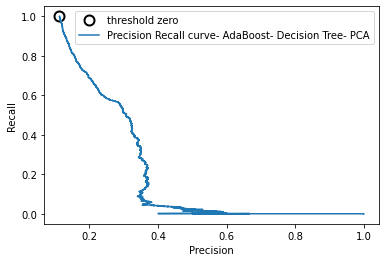

In [241]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ada_dtree, recall_ada_dtree, thresholds_ada_dtree = precision_recall_curve(y_test, pca_ada_dtree.predict_proba(X_test_pca)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ada_dtree))

plt.plot(precision_ada_dtree[close_zero], recall_ada_dtree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ada_dtree, recall_ada_dtree, label="Precision Recall curve- AdaBoost- Decision Tree- PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

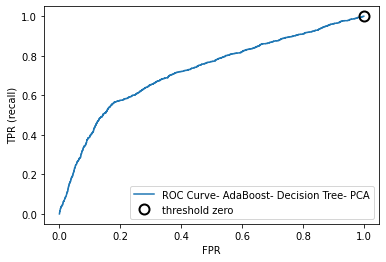

In [242]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ada_dtree, tpr_ada_dtree, thresholds_ada_dtree = roc_curve(y_test, pca_ada_dtree.predict_proba(X_test_pca)[:, 1])

plt.plot(fpr_ada_dtree, tpr_ada_dtree, label="ROC Curve- AdaBoost- Decision Tree- PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ada_dtree))
plt.plot(fpr_ada_dtree[close_zero], tpr_ada_dtree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## AdaBoost - Logistic Regression- PCA

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

pca_log_clf = LogisticRegression(C = 100, max_iter=500, penalty='l2', n_jobs =-1, verbose = 4 )

pca_ada_log = AdaBoostClassifier(pca_log_clf, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
pca_ada_log.fit(X_train_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

AdaBoostClassifier(base_estimator=LogisticRegression(C=100, max_iter=500,
                                                     n_jobs=-1, verbose=4),
                   learning_rate=0.5, n_estimators=200, random_state=0)

In [247]:
pred_ada_log_train_pca = pca_ada_log.predict(X_train_pca)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_ada_log_train_pca, beta=2)))

pred_ada_log_test_pca = pca_ada_log.predict(X_test_pca)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_ada_log_test_pca, beta=2)))

Train score: 0.2263
Test score: 0.2110


#### Model Evaluation

In [248]:
from sklearn.metrics import confusion_matrix

confusion_ada_log= confusion_matrix(y_test, pred_ada_log_test_pca)
print("Confusion matrix:\n{}".format(confusion_ada_log))

Confusion matrix:
[[9028  111]
 [ 949  209]]


In [249]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ada_log_test_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9139
         yes       0.65      0.18      0.28      1158

    accuracy                           0.90     10297
   macro avg       0.78      0.58      0.61     10297
weighted avg       0.88      0.90      0.87     10297



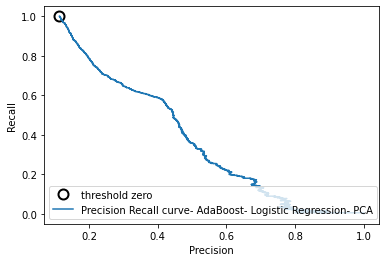

In [250]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_ada_log, recall_ada_log, thresholds_ada_log = precision_recall_curve(y_test, pca_ada_log.predict_proba(X_test_pca)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ada_log))

plt.plot(precision_ada_log[close_zero], recall_ada_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_ada_log, recall_ada_log, label="Precision Recall curve- AdaBoost- Logistic Regression- PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

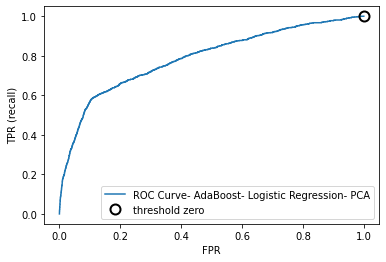

In [251]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_ada_log, tpr_ada_log, thresholds_ada_log = roc_curve(y_test, pca_ada_log.predict_proba(X_test_pca)[:, 1])

plt.plot(fpr_ada_log, tpr_ada_log, label="ROC Curve- AdaBoost- Logistic Regression- PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_ada_log))
plt.plot(fpr_ada_log[close_zero], tpr_ada_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## Gradient Boosting -PCA

In [252]:
from sklearn.ensemble import GradientBoostingClassifier

pca_gboost = GradientBoostingClassifier(random_state=0)
pca_gboost.fit(X_train_pca, y_train)

pred_gboost_train_pca = pca_gboost.predict(X_train_pca)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_gboost_train_pca, beta=2)))

pred_gboost_test_pca = pca_gboost.predict(X_test_pca)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_gboost_test_pca, beta=2)))

Train score: 0.2603
Test score: 0.2148


#### Model Evaluation

In [255]:
from sklearn.metrics import confusion_matrix

confusion_gboost= confusion_matrix(y_test, pred_gboost_test_pca)
print("Confusion matrix:\n{}".format(confusion_gboost))

Confusion matrix:
[[9025  114]
 [ 945  213]]


In [256]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_gboost_test_pca, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94      9139
         yes       0.65      0.18      0.29      1158

    accuracy                           0.90     10297
   macro avg       0.78      0.59      0.62     10297
weighted avg       0.88      0.90      0.87     10297



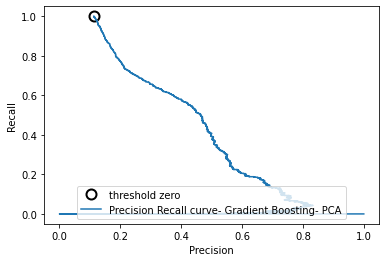

In [257]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_gboost, recall_gboost, thresholds_gboost = precision_recall_curve(y_test, pca_gboost.predict_proba(X_test_pca)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_gboost))

plt.plot(precision_gboost[close_zero], recall_gboost[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_gboost, recall_gboost, label="Precision Recall curve- Gradient Boosting- PCA")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

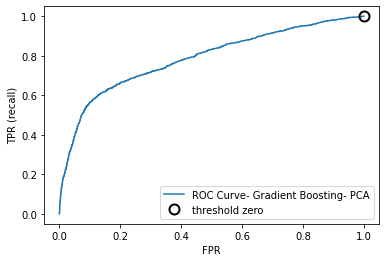

In [258]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_gboost, tpr_gboost, thresholds_gboost = roc_curve(y_test, pca_gboost.predict_proba(X_test_pca)[:, 1])

plt.plot(fpr_gboost, tpr_gboost, label="ROC Curve- Gradient Boosting- PCA")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_gboost))
plt.plot(fpr_gboost[close_zero], tpr_gboost[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Comparing models before and after PCA

Comparing all models for train and test f2score

In [269]:
from sklearn.metrics import fbeta_score

In [270]:
print("K Neighbors Classifier:      Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(grid_search_knn.score(X_train, y_train),grid_search_knn.score(X_test, y_test),pca_grid_search_knn.score(X_train_pca, y_train),pca_grid_search_knn.score(X_test_pca, y_test)))
print("Logistic Regression:         Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(grid_search_logreg.score(X_train, y_train),grid_search_logreg.score(X_test, y_test),pca_grid_search_logreg.score(X_train_pca, y_train),pca_grid_search_logreg.score(X_test_pca, y_test)))
print("Linear SVC:                  Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(grid_search_linsvc.score(X_train, y_train),grid_search_linsvc.score(X_test, y_test),pca_grid_search_linsvc.score(X_train_pca, y_train),pca_grid_search_linsvc.score(X_test_pca, y_test)))
print("SVC(kernel='linear'):        Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(grid_search_ksvclin.score(X_train, y_train),grid_search_ksvclin.score(X_test, y_test),pca_grid_search_ksvclin.score(X_train_pca, y_train),pca_grid_search_ksvclin.score(X_test_pca, y_test)))
print("SVC(kernel='poly'):          Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(random_search_ksvcpoly.score(X_train, y_train),random_search_ksvcpoly.score(X_test, y_test),pca_random_search_ksvcpoly.score(X_train_pca, y_train),pca_random_search_ksvcpoly.score(X_test_pca, y_test)))
print("SVC(kernel='rbf'):           Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(grid_search_ksvcrbf.score(X_train, y_train),grid_search_ksvcrbf.score(X_test, y_test),pca_grid_search_ksvcrbf.score(X_train_pca, y_train),pca_grid_search_ksvcrbf.score(X_test_pca, y_test)))
print("Decision Tree:               Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(grid_search_dtree.score(X_train, y_train),grid_search_dtree.score(X_test, y_test),pca_grid_search_dtree.score(X_train_pca, y_train),pca_grid_search_dtree.score(X_test_pca, y_test)))
print("Voting Classifier-Hard:      Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(fbeta_score(y_train, pred_voting_hard_train, beta=2),fbeta_score(y_test, pred_voting_hard_test, beta=2),fbeta_score(y_train, pred_voting_hard_train_pca, beta=2),fbeta_score(y_test, pred_voting_hard_test_pca)))
print("Voting Classifier-Soft:      Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(fbeta_score(y_train, pred_voting_soft_train, beta=2),fbeta_score(y_test, pred_voting_soft_test, beta=2),fbeta_score(y_train, pred_voting_soft_train_pca, beta=2),fbeta_score(y_test, pred_voting_soft_test_pca)))
print("Bagging-Logistic Regression: Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(fbeta_score(y_train, pred_bag_log_train, beta=2),fbeta_score(y_test, pred_bag_log_test, beta=2),fbeta_score(y_train, pred_bag_log_train_pca, beta=2),fbeta_score(y_test, pred_bag_log_test_pca, beta=2)))
print("Bagging-Random Forest:       Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(fbeta_score(y_train, pred_bag_rnd_train, beta=2),fbeta_score(y_test, pred_bag_rnd_test, beta=2),fbeta_score(y_train, pred_bag_rnd_train_pca, beta=2),fbeta_score(y_test, pred_bag_rnd_test_pca, beta=2)))
print("Pasting-Logistic Regression: Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(fbeta_score(y_train, pred_pst_log_train, beta=2),fbeta_score(y_test, pred_pst_log_test, beta=2),fbeta_score(y_train, pred_pst_log_train_pca, beta=2),fbeta_score(y_test, pred_pst_log_test_pca, beta=2)))
print("Pasting-Random Forest:       Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(fbeta_score(y_train, pred_pst_rnd_train, beta=2),fbeta_score(y_test, pred_pst_rnd_test, beta=2),fbeta_score(y_train, pred_pst_rnd_train_pca, beta=2),fbeta_score(y_test, pred_pst_rnd_test_pca, beta=2)))
print("AdaBoost-Decision Tree:      Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(fbeta_score(y_train, pred_ada_dtree_train, beta=2),fbeta_score(y_test, pred_ada_dtree_test, beta=2),fbeta_score(y_train, pred_ada_dtree_train_pca, beta=2),fbeta_score(y_test, pred_ada_dtree_test_pca, beta=2)))
print("AdaBoost-Logistic Regression:Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(fbeta_score(y_train, pred_ada_log_train, beta=2),fbeta_score(y_test, pred_ada_log_test, beta=2),fbeta_score(y_train, pred_ada_log_train_pca, beta=2),fbeta_score(y_test, pred_ada_log_test_pca, beta=2)))
print("Gradient Boosting:           Train score: {0:.4f}  Test score: {1:.4f}  AFTER PCA:  Train score: {0:.4f}  Test score: {1:.4f}".format(fbeta_score(y_train, pred_gboost_train, beta=2),fbeta_score(y_test, pred_gboost_test, beta=2),fbeta_score(y_train, pred_gboost_train_pca, beta=2),fbeta_score(y_test, pred_gboost_test_pca, beta=2)))


K Neighbors Classifier:         Train score: 0.2906  Test score: 0.2258  AFTER PCA:  Train score: 0.2976  Test score: 0.2351
Logistic Regression:            Train score: 0.2719  Test score: 0.2454  AFTER PCA:  Train score: 0.2248  Test score: 0.2113
Linear SVC:                     Train score: 0.2584  Test score: 0.2394  AFTER PCA:  Train score: 0.2267  Test score: 0.2129
SVC(kernel = 'linear'):         Train score: 0.2453  Test score: 0.2275  AFTER PCA:  Train score: 0.2282  Test score: 0.2142
SVC(kernel = 'poly'):           Train score: 0.3354  Test score: 0.2777  AFTER PCA:  Train score: 0.2521  Test score: 0.2043
SVC(kernel = 'rbf'):            Train score: 0.3935  Test score: 0.2769  AFTER PCA:  Train score: 0.6497  Test score: 0.2470
Decision Tree Classifier:       Train score: 0.9605  Test score: 0.3271  AFTER PCA:  Train score: 0.8140  Test score: 0.2027
Voting Classifier - Hard:       Train score: 0.3014  Test score: 0.2423  AFTER PCA:  Train score: 0.2326  Test score: 0.2027


## Best Model
The decision tree model is the best model with the highest f2score as shown above.

# Deep Learning

In [166]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [194]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(26, input_dim=52, activation='relu'))
    model.add(Dense(13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Recall()])
    return model

You can set a random seed to repruducibility

In [195]:
seed = 10
np.random.seed(10)

Load dataset and create <code>KerasClassifier</code> 

In [196]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search_dl = GridSearchCV(estimator= model, param_grid = param_grid, cv = 2, scoring= f2score, return_train_score=True, n_jobs= -1, verbose = 4)

In [197]:
grid_search_dl_result = grid_search_dl.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  16 out of  24 | elapsed:  3.9min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.7min finished


In [198]:
print("Best parameters: {}".format(grid_search_dl.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dl.best_score_))

Best parameters: {'batch_size': 10, 'epochs': 100}
Best cross-validation score: 0.33


In [199]:
# convert to DataFrame
results_dl = pd.DataFrame(grid_search_dl.cv_results_)
# show the first 5 rows
display(results_dl.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,40.674963,0.204355,4.368758,0.135618,10,10,"{'batch_size': 10, 'epochs': 10}",0.313474,0.244949,0.279211,0.034262,10,0.345094,0.292005,0.318549,0.026545
1,182.151918,0.291737,3.370363,0.267782,10,50,"{'batch_size': 10, 'epochs': 50}",0.302798,0.274402,0.288600,0.014198,9,0.462527,0.439306,0.450917,0.011610
2,280.128607,0.175215,1.208114,0.004340,10,100,"{'batch_size': 10, 'epochs': 100}",0.371593,0.295086,0.333339,0.038253,1,0.559271,0.496735,0.528003,0.031268
3,25.159067,0.277739,5.427576,0.230469,20,10,"{'batch_size': 20, 'epochs': 10}",0.300000,0.256495,0.278247,0.021753,11,0.309769,0.285600,0.297685,0.012084
4,109.811917,0.336731,2.903146,0.115573,20,50,"{'batch_size': 20, 'epochs': 50}",0.313536,0.296783,0.305159,0.008376,4,0.435640,0.428773,0.432206,0.003434


In [200]:
print('Train score: {:.4f}'.format(grid_search_dl.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_search_dl.score(X_test, y_test)))

C:\Users\neema\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train score: 0.4470
Test score: 0.2920


In [201]:
pred_dl = grid_search_dl.predict(X_test)

## Model Evaluation

In [202]:
from sklearn.metrics import confusion_matrix

confusion_dl = confusion_matrix(y_test, pred_dl)
print("Confusion matrix:\n{}".format(confusion_dl))

Confusion matrix:
[[8902  237]
 [ 856  302]]


In [204]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_dl, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.91      0.97      0.94      9139
         yes       0.56      0.26      0.36      1158

    accuracy                           0.89     10297
   macro avg       0.74      0.62      0.65     10297
weighted avg       0.87      0.89      0.88     10297



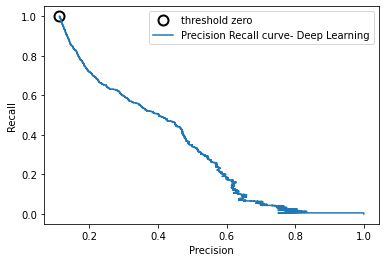

In [205]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_dl, recall_dl, thresholds_dl = precision_recall_curve(y_test, grid_search_dl.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_dl))

plt.plot(precision_dl[close_zero], recall_dl[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_dl, recall_dl, label="Precision Recall curve- Deep Learning")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

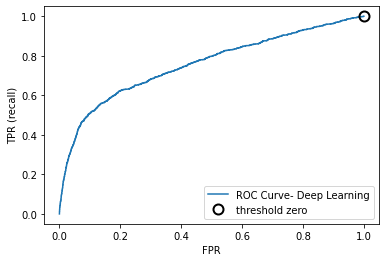

In [208]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_dl, tpr_dl, thresholds_dl = roc_curve(y_test, grid_search_dl.predict_proba(X_test)[:, 1])

plt.plot(fpr_dl, tpr_dl, label="ROC Curve- Deep Learning")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_dl))
plt.plot(fpr_dl[close_zero], tpr_dl[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

# Over sampling Imbalanced data using SMOTE

In [70]:
#!pip install imblearn

In [273]:
y_train.value_counts()

0    27409
1     3482
Name: y, dtype: int64

The dataset is imbalanced. We use SMOTE to oversample the dataset to get better results

Oversampling the train data:

In [274]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)

In [275]:
y_train_s.value_counts()

0    27409
1    27409
Name: y, dtype: int64

## Running best model on balanced data

In [276]:
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90], 
              'criterion': ['entropy','gini']}


print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90], 'criterion': ['entropy', 'gini']}


In [277]:
from sklearn.tree import DecisionTreeClassifier

grid_search_dtree_s = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv=5, scoring= f2score, return_train_score=True, n_jobs= -1, verbose = 4)

In [278]:
grid_search_dtree_s.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   12.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=4)

In [279]:
print("Best parameters: {}".format(grid_search_dtree_s.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree_s.best_score_))

Best parameters: {'criterion': 'entropy', 'max_depth': 40}
Best cross-validation score: 0.90


In [280]:
# convert to DataFrame
results_dtree_s = pd.DataFrame(grid_search_dtree_s.cv_results_)
# show the first 5 rows
display(results_dtree_s.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.324029,0.014678,0.052250,0.007117,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.666705,0.739053,0.725974,...,0.718643,0.026319,32,0.731925,0.714671,0.717968,0.716983,0.716475,0.719604,0.006253
1,0.345631,0.012425,0.028173,0.020157,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.665901,0.775700,0.728633,...,0.726258,0.035018,31,0.731873,0.759020,0.722951,0.716983,0.716334,0.729432,0.015811
2,0.398213,0.028709,0.005624,0.004651,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.687923,0.788443,0.814013,...,0.772443,0.045252,27,0.802171,0.751272,0.794922,0.739378,0.775231,0.772595,0.024241
3,0.410945,0.036687,0.007117,0.003206,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.666113,0.815842,0.801936,...,0.775411,0.055407,25,0.802597,0.778131,0.781360,0.761807,0.771248,0.779029,0.013556
4,0.472910,0.026099,0.009851,0.006905,entropy,8,"{'criterion': 'entropy', 'max_depth': 8}",0.635179,0.846759,0.859799,...,0.805141,0.085841,23,0.824850,0.812264,0.828206,0.799609,0.822254,0.817437,0.010380


# Final Model

Training model with entire X_train_s using best parameters and predict the target values for y_test

In [281]:
from sklearn.tree import DecisionTreeClassifier

final_model = DecisionTreeClassifier(criterion='gini', max_depth=30 , random_state = 0)

In [282]:
final_model.fit(X_train_s, y_train_s)

DecisionTreeClassifier(max_depth=30, random_state=0)

Accuracy:

In [283]:
print('Train score: {:.4f}'.format(final_model.score(X_train_s, y_train_s)))
print('Test score: {:.4f}'.format(final_model.score(X_test, y_test)))

Train score: 0.9966
Test score: 0.8449


Evaluation metric- f2score

In [284]:
pred_final_model_train = final_model.predict(X_train)
print('Train score: {:.4f}'.format(fbeta_score(y_train, pred_final_model_train, beta=2)))

pred_final_model_test = final_model.predict(X_test)
print('Test score: {:.4f}'.format(fbeta_score(y_test, pred_final_model_test, beta=2)))

Train score: 0.9598
Test score: 0.3538


[Text(109.25714841161424, 213.93290322580646, 'X[12] <= 0.512\ngini = 0.5\nsamples = 54818\nvalue = [27409, 27409]'),
 Text(25.771891182936063, 206.91870967741934, 'X[4] <= 0.0\ngini = 0.232\nsamples = 15732\nvalue = [2103, 13629]'),
 Text(5.568777384933398, 199.90451612903226, 'X[34] <= 0.004\ngini = 0.499\nsamples = 787\nvalue = [379, 408]'),
 Text(2.6439946686672466, 192.89032258064515, 'X[6] <= 0.014\ngini = 0.496\nsamples = 692\nvalue = [377, 315]'),
 Text(0.5700375906845335, 185.87612903225806, 'X[6] <= 0.003\ngini = 0.237\nsamples = 124\nvalue = [17, 107]'),
 Text(0.49403257859326244, 178.86193548387098, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6460426027758047, 178.86193548387098, 'X[7] <= 0.399\ngini = 0.205\nsamples = 121\nvalue = [14, 107]'),
 Text(0.3800250604563557, 171.84774193548387, 'X[11] <= 0.004\ngini = 0.15\nsamples = 110\nvalue = [9, 101]'),
 Text(0.22801503627381342, 164.83354838709678, 'X[26] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.1

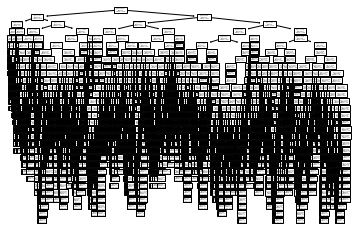

In [285]:
from sklearn import tree
tree.plot_tree(final_model)

In [286]:
pred_final = final_model.predict(X_test)

In [287]:
pred_final

array([0, 0, 0, ..., 0, 0, 0])

## Model Evaluation

In [288]:
from sklearn.metrics import confusion_matrix

confusion_final = confusion_matrix(y_test, pred_final)
print("Confusion matrix:\n{}".format(confusion_final))

Confusion matrix:
[[8282  857]
 [ 740  418]]


Number of False negatives have been drastically decreased compared to previous models which can prove to be valuable for this classification task.
Using this model, more clients who would actually subscribe for the term deposit in the future would be predicted as subscriber.

In [289]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_final, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.92      0.91      0.91      9139
         yes       0.33      0.36      0.34      1158

    accuracy                           0.84     10297
   macro avg       0.62      0.63      0.63     10297
weighted avg       0.85      0.84      0.85     10297



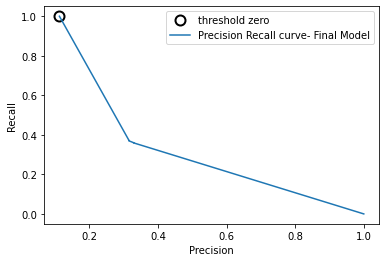

In [290]:
%matplotlib inline

from sklearn.metrics import precision_recall_curve
precision_final, recall_final, thresholds_final = precision_recall_curve(y_test, final_model.predict_proba(X_test)[:, 1])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_final))

plt.plot(precision_final[close_zero], recall_final[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_final, recall_final, label="Precision Recall curve- Final Model")

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

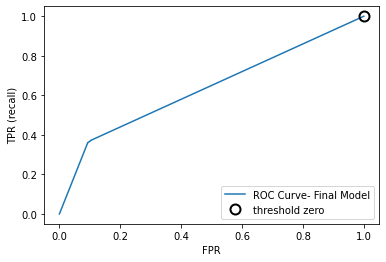

In [291]:
%matplotlib inline 

from sklearn.metrics import roc_curve
fpr_final, tpr_final, thresholds_final = roc_curve(y_test, final_model.predict_proba(X_test)[:, 1])

plt.plot(fpr_final, tpr_final, label="ROC Curve- Final Model")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_final))
plt.plot(fpr_final[close_zero], tpr_final[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)